In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [ ]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 784)


In [ ]:
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
    return generator


In [ ]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002,           beta_1=0.5))
    return discriminator


In [ ]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan



In [ ]:
#creating a function to see how the images are generated , saving to a file
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

In [ ]:
#starting the training of GANs
#Loading the data and calling generator and discriminator function
batch_size=128
(X_train, y_train, X_test, y_test) = load_data()
batch_count = X_train.shape[0] / batch_size


# Creating GAN
generator= create_generator()
print(generator.summary())
discriminator= create_discriminator()
print(discriminator.summary())
gan = create_gan(discriminator, generator)
print(gan.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               25856     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 784)               8

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


None
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 784)               1486352   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 1460225   
                                                                 
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________
None


Epoch 1


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 2s 3ms/step


  1%|          | 1/128 [00:03<07:58,  3.77s/it]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 3/128 [00:03<02:08,  1.03s/it]

4/4 [==============================] - 0s 3ms/step


  4%|▍         | 5/128 [00:04<01:05,  1.87it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 7/128 [00:04<00:40,  2.96it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 9/128 [00:04<00:28,  4.14it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▊         | 11/128 [00:04<00:21,  5.52it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 13/128 [00:04<00:16,  6.95it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 15/128 [00:04<00:13,  8.31it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 17/128 [00:04<00:11,  9.49it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 19/128 [00:05<00:10, 10.63it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 21/128 [00:05<00:09, 11.54it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 23/128 [00:05<00:08, 12.09it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 25/128 [00:05<00:08, 12.55it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 27/128 [00:05<00:07, 12.83it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 29/128 [00:05<00:07, 13.36it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 31/128 [00:05<00:07, 13.48it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 33/128 [00:06<00:06, 13.89it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 35/128 [00:06<00:06, 13.95it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 37/128 [00:06<00:06, 14.06it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 39/128 [00:06<00:06, 14.03it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 41/128 [00:06<00:06, 12.85it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 43/128 [00:06<00:06, 13.37it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 45/128 [00:06<00:06, 13.51it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 47/128 [00:07<00:06, 12.48it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 49/128 [00:07<00:06, 12.90it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 51/128 [00:07<00:05, 13.01it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 53/128 [00:07<00:05, 13.18it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 55/128 [00:07<00:05, 13.42it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 57/128 [00:07<00:05, 13.72it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 59/128 [00:07<00:05, 13.69it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 61/128 [00:08<00:04, 14.03it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 63/128 [00:08<00:04, 14.10it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 65/128 [00:08<00:04, 14.06it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 67/128 [00:08<00:04, 14.18it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 69/128 [00:08<00:04, 14.05it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 71/128 [00:08<00:04, 14.00it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 73/128 [00:08<00:03, 14.17it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 75/128 [00:09<00:03, 14.37it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 77/128 [00:09<00:03, 14.19it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 79/128 [00:09<00:03, 13.88it/s]

4/4 [==============================] - 0s 3ms/step


 63%|██████▎   | 81/128 [00:09<00:03, 13.78it/s]

4/4 [==============================] - 0s 3ms/step


 65%|██████▍   | 83/128 [00:09<00:03, 13.61it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 85/128 [00:09<00:03, 13.90it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 87/128 [00:09<00:02, 13.79it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 89/128 [00:10<00:02, 14.01it/s]

4/4 [==============================] - 0s 3ms/step


 71%|███████   | 91/128 [00:10<00:02, 14.10it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 93/128 [00:10<00:02, 13.86it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 95/128 [00:10<00:02, 13.96it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 97/128 [00:10<00:02, 13.76it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 99/128 [00:10<00:02, 13.87it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 101/128 [00:11<00:01, 13.73it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 103/128 [00:11<00:01, 13.69it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 105/128 [00:11<00:01, 13.91it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 107/128 [00:11<00:01, 13.71it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 109/128 [00:11<00:01, 13.49it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 111/128 [00:11<00:01, 13.70it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 113/128 [00:11<00:01, 14.02it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 115/128 [00:12<00:00, 13.96it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████▏| 117/128 [00:12<00:00, 14.20it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 119/128 [00:12<00:00, 14.33it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 121/128 [00:12<00:00, 14.18it/s]

4/4 [==============================] - 0s 3ms/step


 96%|█████████▌| 123/128 [00:12<00:00, 14.05it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 125/128 [00:12<00:00, 13.94it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 127/128 [00:12<00:00, 14.26it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 128/128 [00:12<00:00,  9.90it/s]

4/4 [==============================] - 0s 4ms/step


Epoch 2


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 2/128 [00:00<00:08, 14.02it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 4/128 [00:00<00:09, 13.68it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 6/128 [00:00<00:08, 13.61it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▋         | 8/128 [00:00<00:08, 13.62it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 10/128 [00:00<00:08, 13.87it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 12/128 [00:00<00:08, 14.11it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 14/128 [00:01<00:08, 14.18it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▎        | 16/128 [00:01<00:07, 14.13it/s]

4/4 [==============================] - 0s 5ms/step


 14%|█▍        | 18/128 [00:01<00:08, 12.77it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 20/128 [00:01<00:08, 12.86it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 22/128 [00:01<00:08, 12.85it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 24/128 [00:01<00:07, 13.14it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 26/128 [00:01<00:07, 13.39it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 28/128 [00:02<00:07, 13.54it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 30/128 [00:02<00:07, 13.64it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 32/128 [00:02<00:07, 13.44it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 34/128 [00:02<00:07, 13.03it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 36/128 [00:02<00:06, 13.30it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 38/128 [00:02<00:06, 13.50it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███▏      | 40/128 [00:02<00:06, 13.61it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 42/128 [00:03<00:06, 13.74it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 44/128 [00:03<00:06, 13.78it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 46/128 [00:03<00:06, 12.71it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 48/128 [00:03<00:06, 13.03it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 50/128 [00:03<00:05, 13.23it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 52/128 [00:03<00:05, 13.24it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 54/128 [00:04<00:05, 13.59it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 56/128 [00:04<00:05, 13.71it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 58/128 [00:04<00:05, 12.64it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 60/128 [00:04<00:05, 12.98it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 62/128 [00:04<00:04, 13.24it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 64/128 [00:04<00:04, 13.49it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 66/128 [00:04<00:04, 13.54it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 68/128 [00:05<00:04, 13.71it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 70/128 [00:05<00:04, 13.69it/s]

4/4 [==============================] - 0s 6ms/step


 56%|█████▋    | 72/128 [00:05<00:04, 13.44it/s]

4/4 [==============================] - 0s 3ms/step


 58%|█████▊    | 74/128 [00:05<00:04, 13.49it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 76/128 [00:05<00:03, 13.81it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 78/128 [00:05<00:03, 13.72it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▎   | 80/128 [00:05<00:03, 13.72it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 82/128 [00:06<00:03, 13.82it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 84/128 [00:06<00:03, 13.72it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 86/128 [00:06<00:03, 13.52it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 88/128 [00:06<00:02, 13.51it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 90/128 [00:06<00:02, 13.42it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 92/128 [00:06<00:02, 13.71it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 94/128 [00:06<00:02, 13.75it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 96/128 [00:07<00:02, 13.60it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 98/128 [00:07<00:02, 12.69it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 100/128 [00:07<00:02, 12.83it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 102/128 [00:07<00:01, 13.22it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 104/128 [00:07<00:01, 13.23it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 106/128 [00:07<00:01, 13.41it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 108/128 [00:08<00:01, 13.59it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 110/128 [00:08<00:01, 13.66it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 112/128 [00:08<00:01, 13.59it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 114/128 [00:08<00:01, 13.30it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 116/128 [00:08<00:00, 13.28it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 118/128 [00:08<00:00, 13.42it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 120/128 [00:08<00:00, 13.59it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 122/128 [00:09<00:00, 13.72it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 124/128 [00:09<00:00, 13.64it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 126/128 [00:09<00:00, 13.67it/s]

4/4 [==============================] - 0s 2ms/step


100%|██████████| 128/128 [00:09<00:00, 13.46it/s]


Epoch 3


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 2/128 [00:00<00:09, 13.07it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 4/128 [00:00<00:09, 13.49it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 6/128 [00:00<00:08, 13.71it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▋         | 8/128 [00:00<00:08, 13.80it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 10/128 [00:00<00:08, 13.71it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 12/128 [00:00<00:08, 13.37it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 14/128 [00:01<00:09, 12.31it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▎        | 16/128 [00:01<00:08, 12.65it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 18/128 [00:01<00:08, 13.20it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 20/128 [00:01<00:08, 13.36it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 22/128 [00:01<00:08, 12.31it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 24/128 [00:01<00:08, 12.74it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 26/128 [00:01<00:07, 12.81it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 28/128 [00:02<00:07, 13.18it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 30/128 [00:02<00:07, 13.10it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 32/128 [00:02<00:07, 13.22it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 34/128 [00:02<00:07, 12.34it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 36/128 [00:02<00:07, 12.72it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 38/128 [00:02<00:06, 13.01it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███▏      | 40/128 [00:03<00:06, 13.14it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 42/128 [00:03<00:06, 13.37it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 44/128 [00:03<00:06, 13.44it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 46/128 [00:03<00:06, 13.54it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 48/128 [00:03<00:05, 13.74it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 50/128 [00:03<00:05, 13.76it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 52/128 [00:03<00:05, 13.90it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 54/128 [00:04<00:05, 13.55it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 56/128 [00:04<00:05, 13.60it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 58/128 [00:04<00:05, 13.85it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 60/128 [00:04<00:04, 13.93it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 62/128 [00:04<00:04, 14.12it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 64/128 [00:04<00:04, 13.89it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 66/128 [00:04<00:04, 14.11it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 68/128 [00:05<00:04, 13.80it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 70/128 [00:05<00:04, 13.81it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 72/128 [00:05<00:04, 13.97it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 74/128 [00:05<00:03, 14.10it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▉    | 76/128 [00:05<00:03, 13.90it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 78/128 [00:05<00:03, 13.86it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▎   | 80/128 [00:05<00:03, 13.60it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 82/128 [00:06<00:03, 13.75it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 84/128 [00:06<00:03, 13.79it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 86/128 [00:06<00:03, 13.88it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 88/128 [00:06<00:03, 12.77it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 90/128 [00:06<00:02, 13.14it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 92/128 [00:06<00:02, 13.27it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 94/128 [00:07<00:02, 13.41it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 96/128 [00:07<00:02, 12.46it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 98/128 [00:07<00:02, 12.84it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 100/128 [00:07<00:02, 13.07it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 102/128 [00:07<00:01, 13.33it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 104/128 [00:07<00:01, 13.29it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 106/128 [00:07<00:01, 13.44it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 108/128 [00:08<00:01, 13.31it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 110/128 [00:08<00:01, 13.37it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 112/128 [00:08<00:01, 13.50it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 114/128 [00:08<00:01, 13.66it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 116/128 [00:08<00:00, 13.66it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 118/128 [00:08<00:00, 13.72it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 120/128 [00:08<00:00, 12.55it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 122/128 [00:09<00:00, 12.61it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 124/128 [00:09<00:00, 12.87it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 126/128 [00:09<00:00, 13.15it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 128/128 [00:09<00:00, 13.34it/s]


Epoch 4


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 2/128 [00:00<00:09, 13.23it/s]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 4/128 [00:00<00:09, 13.38it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 6/128 [00:00<00:09, 13.55it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▋         | 8/128 [00:00<00:09, 13.31it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 10/128 [00:00<00:08, 13.12it/s]

4/4 [==============================] - 0s 8ms/step


  9%|▉         | 12/128 [00:00<00:09, 12.75it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 14/128 [00:01<00:09, 11.94it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▎        | 16/128 [00:01<00:09, 11.26it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 18/128 [00:01<00:09, 11.96it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▌        | 20/128 [00:01<00:08, 12.29it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 22/128 [00:01<00:08, 12.73it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 24/128 [00:01<00:08, 11.94it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 26/128 [00:02<00:08, 12.51it/s]

4/4 [==============================] - 0s 5ms/step


 22%|██▏       | 28/128 [00:02<00:07, 12.74it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 30/128 [00:02<00:07, 12.87it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 32/128 [00:02<00:07, 13.00it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 34/128 [00:02<00:07, 12.85it/s]

4/4 [==============================] - 0s 3ms/step


 28%|██▊       | 36/128 [00:02<00:07, 13.07it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 38/128 [00:03<00:07, 12.15it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███▏      | 40/128 [00:03<00:07, 12.56it/s]

4/4 [==============================] - 0s 3ms/step


 33%|███▎      | 42/128 [00:03<00:06, 12.61it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 44/128 [00:03<00:06, 13.01it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 46/128 [00:03<00:06, 12.87it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 48/128 [00:03<00:06, 12.99it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 50/128 [00:03<00:05, 13.31it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 52/128 [00:04<00:05, 13.43it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 54/128 [00:04<00:05, 12.40it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 56/128 [00:04<00:06, 11.74it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 58/128 [00:04<00:06, 11.12it/s]

4/4 [==============================] - 0s 6ms/step


 47%|████▋     | 60/128 [00:04<00:06, 10.18it/s]

4/4 [==============================] - 0s 6ms/step


 48%|████▊     | 62/128 [00:05<00:07,  9.12it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 63/128 [00:05<00:07,  9.12it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 64/128 [00:05<00:07,  9.08it/s]

4/4 [==============================] - 0s 5ms/step


 51%|█████     | 65/128 [00:05<00:06,  9.15it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 66/128 [00:05<00:06,  9.00it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 67/128 [00:05<00:06,  8.88it/s]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 68/128 [00:05<00:07,  8.29it/s]

4/4 [==============================] - 0s 5ms/step


 54%|█████▍    | 69/128 [00:05<00:06,  8.50it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▍    | 70/128 [00:06<00:07,  8.01it/s]

4/4 [==============================] - 0s 5ms/step


 55%|█████▌    | 71/128 [00:06<00:07,  7.75it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 72/128 [00:06<00:06,  8.15it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 73/128 [00:06<00:06,  8.23it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 74/128 [00:06<00:06,  8.46it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 75/128 [00:06<00:06,  8.03it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 76/128 [00:06<00:06,  8.37it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 78/128 [00:07<00:05,  9.65it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 79/128 [00:07<00:05,  9.28it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 81/128 [00:07<00:04, 10.65it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 83/128 [00:07<00:03, 11.47it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 85/128 [00:07<00:04, 10.24it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 87/128 [00:08<00:05,  7.39it/s]

4/4 [==============================] - 0s 3ms/step


 70%|██████▉   | 89/128 [00:08<00:04,  8.41it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 91/128 [00:08<00:03,  9.51it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 93/128 [00:08<00:03, 10.34it/s]

4/4 [==============================] - 0s 7ms/step


 74%|███████▍  | 95/128 [00:09<00:04,  7.51it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 96/128 [00:09<00:04,  6.82it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 98/128 [00:09<00:03,  8.03it/s]

4/4 [==============================] - 0s 3ms/step


 78%|███████▊  | 100/128 [00:09<00:03,  9.19it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 102/128 [00:09<00:02, 10.13it/s]

4/4 [==============================] - 0s 8ms/step


 81%|████████▏ | 104/128 [00:10<00:03,  6.96it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 105/128 [00:10<00:03,  7.17it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 107/128 [00:10<00:02,  8.44it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▌ | 109/128 [00:10<00:02,  9.07it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 111/128 [00:10<00:01,  9.39it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 113/128 [00:11<00:01,  9.71it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 115/128 [00:11<00:01, 10.64it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████▏| 117/128 [00:11<00:00, 11.37it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 119/128 [00:11<00:00, 11.83it/s]

4/4 [==============================] - 0s 6ms/step


 95%|█████████▍| 121/128 [00:11<00:00, 12.06it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 123/128 [00:11<00:00, 12.39it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 125/128 [00:11<00:00, 12.63it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 127/128 [00:12<00:00, 11.91it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 128/128 [00:12<00:00, 10.49it/s]


Epoch 5


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 2/128 [00:00<00:09, 12.78it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 4/128 [00:00<00:09, 12.79it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 6/128 [00:00<00:09, 12.73it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▋         | 8/128 [00:00<00:09, 12.33it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 10/128 [00:00<00:10, 11.47it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 12/128 [00:00<00:09, 11.91it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 14/128 [00:01<00:10, 11.26it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▎        | 16/128 [00:01<00:09, 11.88it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 18/128 [00:01<00:09, 12.11it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 20/128 [00:01<00:08, 12.43it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 22/128 [00:01<00:08, 12.52it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 24/128 [00:01<00:08, 12.54it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 26/128 [00:02<00:08, 12.59it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 28/128 [00:02<00:08, 11.12it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 30/128 [00:02<00:08, 10.90it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 32/128 [00:02<00:08, 10.70it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 34/128 [00:02<00:08, 11.45it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 36/128 [00:03<00:07, 11.78it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 38/128 [00:03<00:07, 12.03it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███▏      | 40/128 [00:03<00:07, 12.37it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 42/128 [00:03<00:06, 12.46it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▍      | 44/128 [00:03<00:07, 11.67it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 46/128 [00:03<00:06, 11.95it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 48/128 [00:04<00:06, 12.16it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 50/128 [00:04<00:06, 11.46it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 52/128 [00:04<00:06, 11.18it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 54/128 [00:04<00:06, 11.76it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 56/128 [00:04<00:05, 12.21it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 58/128 [00:04<00:05, 12.26it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 60/128 [00:05<00:05, 11.55it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 62/128 [00:05<00:05, 11.97it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 64/128 [00:05<00:05, 11.27it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 66/128 [00:05<00:05, 10.90it/s]

4/4 [==============================] - 0s 7ms/step


 53%|█████▎    | 68/128 [00:05<00:05, 11.31it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 70/128 [00:05<00:04, 11.70it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 72/128 [00:06<00:04, 11.21it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 74/128 [00:06<00:05, 10.24it/s]

4/4 [==============================] - 0s 6ms/step


 59%|█████▉    | 76/128 [00:06<00:05, 10.25it/s]

4/4 [==============================] - 0s 3ms/step


 61%|██████    | 78/128 [00:06<00:04, 11.09it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▎   | 80/128 [00:06<00:04, 11.33it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 82/128 [00:07<00:04, 11.05it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 84/128 [00:07<00:03, 11.46it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 86/128 [00:07<00:03, 10.99it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 88/128 [00:07<00:03, 11.63it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 90/128 [00:07<00:03, 11.13it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 92/128 [00:07<00:03, 11.50it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 94/128 [00:08<00:03, 11.06it/s]

4/4 [==============================] - 0s 2ms/step


 75%|███████▌  | 96/128 [00:08<00:02, 11.66it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 98/128 [00:08<00:02, 11.21it/s]

4/4 [==============================] - 0s 5ms/step


 78%|███████▊  | 100/128 [00:08<00:02, 11.64it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 102/128 [00:08<00:02, 12.02it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 104/128 [00:08<00:01, 12.21it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 106/128 [00:09<00:01, 12.53it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 108/128 [00:09<00:01, 12.76it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 110/128 [00:09<00:01, 12.81it/s]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 112/128 [00:09<00:01, 12.73it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 114/128 [00:09<00:01, 12.94it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████ | 116/128 [00:09<00:00, 12.90it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 118/128 [00:10<00:00, 11.97it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 120/128 [00:10<00:00, 12.24it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 122/128 [00:10<00:00, 12.59it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 124/128 [00:10<00:00, 11.80it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 126/128 [00:10<00:00, 12.23it/s]

4/4 [==============================] - 0s 5ms/step


100%|██████████| 128/128 [00:10<00:00, 11.75it/s]


Epoch 6


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 2/128 [00:00<00:09, 12.75it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 4/128 [00:00<00:10, 11.29it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 6/128 [00:00<00:10, 11.98it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▋         | 8/128 [00:00<00:09, 12.36it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 10/128 [00:00<00:09, 12.71it/s]

4/4 [==============================] - 0s 3ms/step


  9%|▉         | 12/128 [00:00<00:09, 12.83it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 14/128 [00:01<00:08, 12.95it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▎        | 16/128 [00:01<00:08, 12.88it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 18/128 [00:01<00:08, 12.63it/s]

4/4 [==============================] - 0s 5ms/step


 16%|█▌        | 20/128 [00:01<00:08, 12.47it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 22/128 [00:01<00:09, 11.76it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 24/128 [00:01<00:09, 11.27it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 26/128 [00:02<00:10, 10.17it/s]

4/4 [==============================] - 0s 3ms/step


 22%|██▏       | 28/128 [00:02<00:09, 10.17it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 30/128 [00:02<00:09, 10.17it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 32/128 [00:02<00:09, 10.23it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 34/128 [00:03<00:09,  9.66it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 36/128 [00:03<00:08, 10.44it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 38/128 [00:03<00:08, 11.15it/s]

4/4 [==============================] - 0s 5ms/step


 31%|███▏      | 40/128 [00:03<00:07, 11.65it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 42/128 [00:03<00:07, 11.24it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 44/128 [00:03<00:07, 11.68it/s]

4/4 [==============================] - 0s 4ms/step


 36%|███▌      | 46/128 [00:04<00:06, 11.97it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 48/128 [00:04<00:06, 12.10it/s]

4/4 [==============================] - 0s 4ms/step


 39%|███▉      | 50/128 [00:04<00:06, 12.27it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 52/128 [00:04<00:06, 12.53it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 54/128 [00:04<00:06, 11.87it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 56/128 [00:04<00:06, 11.43it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 58/128 [00:05<00:05, 11.83it/s]

4/4 [==============================] - 0s 3ms/step


 47%|████▋     | 60/128 [00:05<00:05, 11.87it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 62/128 [00:05<00:05, 11.27it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 64/128 [00:05<00:05, 11.74it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 66/128 [00:05<00:05, 12.12it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 68/128 [00:05<00:04, 12.42it/s]

4/4 [==============================] - 0s 5ms/step


 55%|█████▍    | 70/128 [00:05<00:04, 12.48it/s]

4/4 [==============================] - 0s 6ms/step


 56%|█████▋    | 72/128 [00:06<00:04, 11.66it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 74/128 [00:06<00:04, 11.32it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 76/128 [00:06<00:04, 11.03it/s]

4/4 [==============================] - 0s 4ms/step


 61%|██████    | 78/128 [00:06<00:04, 11.59it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▎   | 80/128 [00:06<00:04, 11.98it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 82/128 [00:07<00:03, 12.03it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 84/128 [00:07<00:03, 12.07it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 86/128 [00:07<00:03, 11.79it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 88/128 [00:07<00:03, 12.25it/s]

4/4 [==============================] - 0s 4ms/step


 70%|███████   | 90/128 [00:07<00:03, 12.40it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 92/128 [00:07<00:03, 11.64it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 94/128 [00:08<00:02, 11.93it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 96/128 [00:08<00:02, 11.42it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 98/128 [00:08<00:02, 11.75it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 100/128 [00:08<00:02, 10.61it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 102/128 [00:08<00:02, 10.65it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 104/128 [00:09<00:02, 10.51it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 106/128 [00:09<00:02, 10.37it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 108/128 [00:09<00:01, 10.93it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 110/128 [00:09<00:01, 11.44it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 112/128 [00:09<00:01, 11.07it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 114/128 [00:09<00:01, 11.53it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 116/128 [00:10<00:01, 11.06it/s]

4/4 [==============================] - 0s 4ms/step


 92%|█████████▏| 118/128 [00:10<00:00, 10.57it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 120/128 [00:10<00:00, 11.18it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 122/128 [00:10<00:00, 10.82it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 124/128 [00:10<00:00, 11.45it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 126/128 [00:10<00:00, 10.94it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 128/128 [00:11<00:00, 11.47it/s]


Epoch 7


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 2/128 [00:00<00:10, 12.45it/s]

4/4 [==============================] - 0s 3ms/step


  3%|▎         | 4/128 [00:00<00:09, 12.62it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▍         | 6/128 [00:00<00:10, 11.49it/s]

4/4 [==============================] - 0s 5ms/step


  6%|▋         | 8/128 [00:00<00:11, 10.84it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 10/128 [00:00<00:11, 10.64it/s]

4/4 [==============================] - 0s 2ms/step


  9%|▉         | 12/128 [00:01<00:10, 11.06it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 14/128 [00:01<00:09, 11.67it/s]

4/4 [==============================] - 0s 5ms/step


 12%|█▎        | 16/128 [00:01<00:09, 11.66it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 18/128 [00:01<00:09, 11.87it/s]

4/4 [==============================] - 0s 5ms/step


 16%|█▌        | 20/128 [00:01<00:09, 11.27it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 22/128 [00:01<00:09, 10.82it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 24/128 [00:02<00:09, 10.65it/s]

4/4 [==============================] - 0s 3ms/step


 20%|██        | 26/128 [00:02<00:09, 11.23it/s]

4/4 [==============================] - 0s 5ms/step


 22%|██▏       | 28/128 [00:02<00:08, 11.69it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 30/128 [00:02<00:08, 11.13it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 32/128 [00:02<00:09, 10.16it/s]

4/4 [==============================] - 0s 5ms/step


 27%|██▋       | 34/128 [00:03<00:08, 10.51it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 36/128 [00:03<00:08, 11.19it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 38/128 [00:03<00:07, 11.60it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███▏      | 40/128 [00:03<00:07, 11.95it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 42/128 [00:03<00:07, 12.15it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 44/128 [00:03<00:06, 12.32it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 46/128 [00:04<00:07, 11.61it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 48/128 [00:04<00:06, 11.95it/s]

4/4 [==============================] - 0s 3ms/step


 39%|███▉      | 50/128 [00:04<00:06, 12.25it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 52/128 [00:04<00:06, 12.24it/s]

4/4 [==============================] - 0s 4ms/step


 42%|████▏     | 54/128 [00:04<00:05, 12.53it/s]

4/4 [==============================] - 0s 4ms/step


 44%|████▍     | 56/128 [00:04<00:06, 11.59it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 58/128 [00:05<00:06, 11.04it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 60/128 [00:05<00:06, 10.67it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 62/128 [00:05<00:06, 10.49it/s]

4/4 [==============================] - 0s 5ms/step


 50%|█████     | 64/128 [00:05<00:06, 10.24it/s]

4/4 [==============================] - 0s 6ms/step


 52%|█████▏    | 66/128 [00:05<00:06, 10.13it/s]

4/4 [==============================] - 0s 4ms/step


 53%|█████▎    | 68/128 [00:06<00:06,  9.46it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▍    | 70/128 [00:06<00:05, 10.15it/s]

4/4 [==============================] - 0s 4ms/step


 56%|█████▋    | 72/128 [00:06<00:05, 10.02it/s]

4/4 [==============================] - 0s 4ms/step


 58%|█████▊    | 74/128 [00:06<00:05,  9.41it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 76/128 [00:06<00:05, 10.16it/s]

4/4 [==============================] - 0s 5ms/step


 61%|██████    | 78/128 [00:07<00:04, 10.10it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▎   | 80/128 [00:07<00:04, 10.51it/s]

4/4 [==============================] - 0s 4ms/step


 64%|██████▍   | 82/128 [00:07<00:04, 10.37it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 84/128 [00:07<00:04, 10.99it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 86/128 [00:07<00:03, 10.69it/s]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 88/128 [00:08<00:03, 10.50it/s]

4/4 [==============================] - 0s 5ms/step


 70%|███████   | 90/128 [00:08<00:03, 10.83it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 92/128 [00:08<00:03, 10.59it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 94/128 [00:08<00:03,  9.80it/s]

4/4 [==============================] - 0s 4ms/step


 75%|███████▌  | 96/128 [00:08<00:03, 10.38it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 98/128 [00:09<00:02, 10.08it/s]

4/4 [==============================] - 0s 6ms/step


 78%|███████▊  | 100/128 [00:09<00:02,  9.89it/s]

4/4 [==============================] - 0s 5ms/step


 80%|███████▉  | 102/128 [00:09<00:02, 10.45it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 104/128 [00:09<00:02,  9.79it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 106/128 [00:09<00:02, 10.46it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▍ | 108/128 [00:10<00:02,  9.79it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▌ | 110/128 [00:10<00:01,  9.85it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 112/128 [00:10<00:01, 10.10it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 114/128 [00:10<00:01, 10.80it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 116/128 [00:10<00:01, 11.28it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 118/128 [00:10<00:00, 11.06it/s]

4/4 [==============================] - 0s 5ms/step


 94%|█████████▍| 120/128 [00:11<00:00, 10.09it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 122/128 [00:11<00:00, 10.44it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 124/128 [00:11<00:00, 11.12it/s]

4/4 [==============================] - 0s 5ms/step


 98%|█████████▊| 126/128 [00:11<00:00, 10.86it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 128/128 [00:11<00:00, 10.82it/s]


Epoch 8


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 5ms/step


  2%|▏         | 2/128 [00:00<00:10, 11.68it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 4/128 [00:00<00:10, 12.02it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▍         | 6/128 [00:00<00:10, 12.05it/s]

4/4 [==============================] - 0s 2ms/step


  6%|▋         | 8/128 [00:00<00:10, 11.45it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 10/128 [00:00<00:10, 10.93it/s]

4/4 [==============================] - 0s 5ms/step


  9%|▉         | 12/128 [00:01<00:10, 11.51it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 14/128 [00:01<00:10, 11.01it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▎        | 16/128 [00:01<00:10, 10.65it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 18/128 [00:01<00:10, 10.38it/s]

4/4 [==============================] - 0s 5ms/step


 16%|█▌        | 20/128 [00:01<00:09, 11.12it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 22/128 [00:01<00:09, 11.57it/s]

4/4 [==============================] - 0s 5ms/step


 19%|█▉        | 24/128 [00:02<00:09, 10.45it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 26/128 [00:02<00:09, 11.07it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 28/128 [00:02<00:08, 11.35it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 30/128 [00:02<00:08, 11.08it/s]

4/4 [==============================] - 0s 4ms/step


 25%|██▌       | 32/128 [00:02<00:08, 11.59it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 34/128 [00:03<00:12,  7.41it/s]

4/4 [==============================] - 0s 6ms/step


 27%|██▋       | 35/128 [00:03<00:12,  7.50it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 37/128 [00:03<00:11,  8.23it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 39/128 [00:03<00:09,  9.24it/s]

4/4 [==============================] - 0s 4ms/step


 32%|███▏      | 41/128 [00:04<00:09,  9.52it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▎      | 43/128 [00:04<00:09,  9.07it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▌      | 45/128 [00:04<00:08,  9.85it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 47/128 [00:04<00:07, 10.36it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 49/128 [00:04<00:07, 10.42it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 51/128 [00:04<00:07, 10.41it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████▏     | 53/128 [00:05<00:07, 10.37it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 55/128 [00:05<00:06, 10.91it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 57/128 [00:05<00:06, 11.36it/s]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 59/128 [00:05<00:06, 10.29it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 61/128 [00:05<00:06, 10.23it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 63/128 [00:06<00:05, 10.87it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 65/128 [00:06<00:06, 10.31it/s]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 67/128 [00:06<00:05, 10.64it/s]

4/4 [==============================] - 0s 4ms/step


 54%|█████▍    | 69/128 [00:06<00:05, 10.23it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▌    | 71/128 [00:06<00:05, 10.10it/s]

4/4 [==============================] - 0s 4ms/step


 57%|█████▋    | 73/128 [00:07<00:05,  9.83it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 75/128 [00:07<00:05, 10.39it/s]

4/4 [==============================] - 0s 6ms/step


 60%|██████    | 77/128 [00:07<00:04, 10.99it/s]

4/4 [==============================] - 0s 6ms/step


 62%|██████▏   | 79/128 [00:07<00:04, 10.83it/s]

4/4 [==============================] - 0s 6ms/step


 63%|██████▎   | 81/128 [00:07<00:04, 10.75it/s]

4/4 [==============================] - 0s 6ms/step


 65%|██████▍   | 83/128 [00:07<00:04, 11.19it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 85/128 [00:08<00:04, 10.20it/s]

4/4 [==============================] - 0s 5ms/step


 68%|██████▊   | 87/128 [00:08<00:04, 10.13it/s]

4/4 [==============================] - 0s 6ms/step


 70%|██████▉   | 89/128 [00:08<00:03, 10.08it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 91/128 [00:08<00:03, 10.81it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 93/128 [00:08<00:03, 11.24it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 95/128 [00:09<00:03, 10.97it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 97/128 [00:09<00:02, 11.19it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 99/128 [00:09<00:02, 10.96it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 101/128 [00:09<00:02, 10.48it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 103/128 [00:09<00:02, 11.04it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 105/128 [00:10<00:02, 10.12it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▎ | 107/128 [00:10<00:02,  9.49it/s]

4/4 [==============================] - 0s 4ms/step


 85%|████████▌ | 109/128 [00:10<00:01, 10.23it/s]

4/4 [==============================] - 0s 5ms/step


 87%|████████▋ | 111/128 [00:10<00:01,  9.62it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 113/128 [00:10<00:01,  9.85it/s]

4/4 [==============================] - 0s 4ms/step


 90%|████████▉ | 115/128 [00:11<00:01, 10.03it/s]

4/4 [==============================] - 0s 5ms/step


 91%|█████████▏| 117/128 [00:11<00:01, 10.60it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 119/128 [00:11<00:00, 10.95it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 121/128 [00:11<00:00, 10.67it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 123/128 [00:11<00:00, 11.10it/s]

4/4 [==============================] - 0s 5ms/step


 98%|█████████▊| 125/128 [00:11<00:00, 11.34it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 127/128 [00:12<00:00, 11.71it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 128/128 [00:12<00:00, 10.47it/s]


Epoch 9


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 2/128 [00:00<00:10, 12.15it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 4/128 [00:00<00:09, 12.41it/s]

4/4 [==============================] - 0s 5ms/step


  5%|▍         | 6/128 [00:00<00:12, 10.08it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▋         | 8/128 [00:00<00:10, 10.93it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 10/128 [00:00<00:11, 10.49it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 12/128 [00:01<00:11, 10.37it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 14/128 [00:01<00:10, 11.02it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▎        | 16/128 [00:01<00:10, 10.78it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 18/128 [00:01<00:09, 11.28it/s]

4/4 [==============================] - 0s 5ms/step


 16%|█▌        | 20/128 [00:01<00:10, 10.11it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 22/128 [00:02<00:10, 10.11it/s]

4/4 [==============================] - 0s 4ms/step


 19%|█▉        | 24/128 [00:02<00:10, 10.19it/s]

4/4 [==============================] - 0s 5ms/step


 20%|██        | 26/128 [00:02<00:09, 10.22it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 28/128 [00:02<00:09, 10.13it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 30/128 [00:02<00:10,  9.46it/s]

4/4 [==============================] - 0s 6ms/step


 24%|██▍       | 31/128 [00:03<00:10,  9.14it/s]

4/4 [==============================] - 0s 5ms/step


 25%|██▌       | 32/128 [00:03<00:10,  8.83it/s]

4/4 [==============================] - 0s 5ms/step


 26%|██▌       | 33/128 [00:03<00:11,  8.59it/s]

4/4 [==============================] - 0s 4ms/step


 27%|██▋       | 35/128 [00:03<00:09,  9.82it/s]

4/4 [==============================] - 0s 5ms/step


 29%|██▉       | 37/128 [00:03<00:08, 10.58it/s]

4/4 [==============================] - 0s 3ms/step


 30%|███       | 39/128 [00:03<00:07, 11.31it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 41/128 [00:03<00:07, 11.48it/s]

4/4 [==============================] - 0s 2ms/step


 34%|███▎      | 43/128 [00:04<00:07, 11.78it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 45/128 [00:04<00:07, 11.22it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 47/128 [00:04<00:07, 10.91it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 49/128 [00:04<00:07, 10.38it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 51/128 [00:04<00:07, 10.68it/s]

4/4 [==============================] - 0s 5ms/step


 41%|████▏     | 53/128 [00:05<00:07, 10.40it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 55/128 [00:05<00:07,  9.68it/s]

4/4 [==============================] - 0s 6ms/step


 45%|████▍     | 57/128 [00:05<00:07,  9.90it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 59/128 [00:05<00:06,  9.95it/s]

4/4 [==============================] - 0s 7ms/step


 48%|████▊     | 61/128 [00:05<00:06, 10.08it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 63/128 [00:06<00:06,  9.97it/s]

4/4 [==============================] - 0s 4ms/step


 51%|█████     | 65/128 [00:06<00:05, 10.55it/s]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 67/128 [00:06<00:05, 10.88it/s]

4/4 [==============================] - 0s 5ms/step


 54%|█████▍    | 69/128 [00:06<00:05, 10.48it/s]

4/4 [==============================] - 0s 5ms/step


 55%|█████▌    | 71/128 [00:06<00:05, 10.88it/s]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 73/128 [00:06<00:04, 11.04it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▊    | 75/128 [00:07<00:04, 11.44it/s]

4/4 [==============================] - 0s 5ms/step


 60%|██████    | 77/128 [00:07<00:04, 11.41it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 79/128 [00:07<00:04, 11.64it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 81/128 [00:07<00:04, 11.64it/s]

4/4 [==============================] - 0s 5ms/step


 65%|██████▍   | 83/128 [00:07<00:04, 11.00it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▋   | 85/128 [00:08<00:04, 10.37it/s]

4/4 [==============================] - 0s 5ms/step


 68%|██████▊   | 87/128 [00:08<00:04, 10.17it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 89/128 [00:08<00:03, 10.58it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 91/128 [00:08<00:03, 10.46it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 93/128 [00:08<00:03, 10.16it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 95/128 [00:09<00:03, 10.75it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 97/128 [00:09<00:03, 10.00it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 99/128 [00:09<00:02,  9.95it/s]

4/4 [==============================] - 0s 5ms/step


 79%|███████▉  | 101/128 [00:09<00:02,  9.34it/s]

4/4 [==============================] - 0s 5ms/step


 80%|████████  | 103/128 [00:09<00:02,  9.91it/s]

4/4 [==============================] - 0s 4ms/step


 82%|████████▏ | 105/128 [00:10<00:02, 10.50it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 107/128 [00:10<00:01, 11.00it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▌ | 109/128 [00:10<00:01, 10.52it/s]

4/4 [==============================] - 0s 4ms/step


 87%|████████▋ | 111/128 [00:10<00:01, 11.03it/s]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 113/128 [00:10<00:01, 11.11it/s]

4/4 [==============================] - 0s 5ms/step


 90%|████████▉ | 115/128 [00:10<00:01, 10.61it/s]

4/4 [==============================] - 0s 5ms/step


 91%|█████████▏| 117/128 [00:11<00:00, 11.02it/s]

4/4 [==============================] - 0s 5ms/step


 93%|█████████▎| 119/128 [00:11<00:00, 10.09it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 121/128 [00:11<00:00, 10.17it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▌| 123/128 [00:11<00:00, 10.13it/s]

4/4 [==============================] - 0s 5ms/step


 98%|█████████▊| 125/128 [00:11<00:00, 10.11it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 127/128 [00:12<00:00, 10.76it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 128/128 [00:12<00:00, 10.49it/s]


Epoch 10


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 2/128 [00:00<00:12,  9.80it/s]

4/4 [==============================] - 0s 5ms/step


  2%|▏         | 3/128 [00:00<00:13,  9.12it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 5/128 [00:00<00:11, 10.53it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 7/128 [00:00<00:10, 11.44it/s]

4/4 [==============================] - 0s 4ms/step


  7%|▋         | 9/128 [00:00<00:11, 10.01it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▊         | 11/128 [00:01<00:10, 10.85it/s]

4/4 [==============================] - 0s 4ms/step


 10%|█         | 13/128 [00:01<00:10, 11.22it/s]

4/4 [==============================] - 0s 5ms/step


 12%|█▏        | 15/128 [00:01<00:10, 10.76it/s]

4/4 [==============================] - 0s 3ms/step


 13%|█▎        | 17/128 [00:01<00:09, 11.12it/s]

4/4 [==============================] - 0s 4ms/step


 15%|█▍        | 19/128 [00:01<00:09, 11.32it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 21/128 [00:01<00:09, 11.76it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 23/128 [00:02<00:08, 12.17it/s]

4/4 [==============================] - 0s 5ms/step


 20%|█▉        | 25/128 [00:02<00:08, 12.05it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 27/128 [00:02<00:08, 12.38it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 29/128 [00:02<00:08, 12.18it/s]

4/4 [==============================] - 0s 5ms/step


 24%|██▍       | 31/128 [00:02<00:09, 10.69it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 33/128 [00:02<00:08, 10.87it/s]

4/4 [==============================] - 0s 5ms/step


 27%|██▋       | 35/128 [00:03<00:09, 10.25it/s]

4/4 [==============================] - 0s 5ms/step


 29%|██▉       | 37/128 [00:03<00:09,  9.61it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 39/128 [00:03<00:08, 10.19it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 41/128 [00:03<00:08, 10.86it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▎      | 43/128 [00:03<00:07, 11.13it/s]

4/4 [==============================] - 0s 6ms/step


 35%|███▌      | 45/128 [00:04<00:08, 10.05it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 47/128 [00:04<00:07, 10.40it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 49/128 [00:04<00:07, 10.83it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 51/128 [00:04<00:07, 10.43it/s]

4/4 [==============================] - 0s 5ms/step


 41%|████▏     | 53/128 [00:04<00:07,  9.77it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 55/128 [00:05<00:07,  9.88it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▍     | 57/128 [00:05<00:07,  9.93it/s]

4/4 [==============================] - 0s 4ms/step


 46%|████▌     | 59/128 [00:05<00:06, 10.67it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 61/128 [00:05<00:06, 10.93it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 63/128 [00:05<00:05, 11.30it/s]

4/4 [==============================] - 0s 5ms/step


 51%|█████     | 65/128 [00:05<00:05, 11.68it/s]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 67/128 [00:06<00:05, 10.49it/s]

4/4 [==============================] - 0s 5ms/step


 54%|█████▍    | 69/128 [00:06<00:06,  9.81it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 71/128 [00:06<00:05, 10.36it/s]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 73/128 [00:06<00:05,  9.68it/s]

4/4 [==============================] - 0s 3ms/step


 59%|█████▊    | 75/128 [00:07<00:05, 10.23it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 77/128 [00:07<00:04, 10.88it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 79/128 [00:07<00:04, 10.50it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 81/128 [00:07<00:04, 10.90it/s]

4/4 [==============================] - 0s 5ms/step


 65%|██████▍   | 83/128 [00:07<00:04, 10.49it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 85/128 [00:07<00:03, 10.90it/s]

4/4 [==============================] - 0s 5ms/step


 68%|██████▊   | 87/128 [00:08<00:03, 10.62it/s]

4/4 [==============================] - 0s 4ms/step


 70%|██████▉   | 89/128 [00:08<00:03, 10.37it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 91/128 [00:08<00:03,  9.74it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 93/128 [00:08<00:03, 10.23it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 95/128 [00:08<00:03, 10.24it/s]

4/4 [==============================] - 0s 3ms/step


 76%|███████▌  | 97/128 [00:09<00:02, 10.86it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 99/128 [00:09<00:02, 10.46it/s]

4/4 [==============================] - 0s 5ms/step


 79%|███████▉  | 101/128 [00:09<00:02, 10.45it/s]

4/4 [==============================] - 0s 7ms/step


 80%|████████  | 103/128 [00:09<00:02,  9.76it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 105/128 [00:09<00:02,  9.81it/s]

4/4 [==============================] - 0s 5ms/step


 83%|████████▎ | 106/128 [00:10<00:02,  9.42it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 108/128 [00:10<00:01, 10.24it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 110/128 [00:10<00:01,  9.59it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 111/128 [00:10<00:01,  9.26it/s]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 112/128 [00:10<00:01,  8.98it/s]

4/4 [==============================] - 0s 5ms/step


 89%|████████▉ | 114/128 [00:10<00:01,  9.22it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 116/128 [00:11<00:01,  9.53it/s]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 118/128 [00:11<00:01,  9.63it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 120/128 [00:11<00:00,  9.76it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 122/128 [00:11<00:00, 10.28it/s]

4/4 [==============================] - 0s 3ms/step


 97%|█████████▋| 124/128 [00:11<00:00, 10.32it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 126/128 [00:12<00:00, 11.05it/s]

4/4 [==============================] - 0s 5ms/step


100%|██████████| 128/128 [00:12<00:00, 10.46it/s]


Epoch 11


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 1/128 [00:00<00:16,  7.85it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 3/128 [00:00<00:13,  9.20it/s]

4/4 [==============================] - 0s 5ms/step


  4%|▍         | 5/128 [00:00<00:12, 10.13it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▌         | 7/128 [00:00<00:11, 10.67it/s]

4/4 [==============================] - 0s 5ms/step


  7%|▋         | 9/128 [00:00<00:12,  9.64it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 10/128 [00:01<00:12,  9.18it/s]

4/4 [==============================] - 0s 5ms/step


  9%|▊         | 11/128 [00:01<00:13,  8.89it/s]

4/4 [==============================] - 0s 6ms/step


 10%|█         | 13/128 [00:01<00:11,  9.82it/s]

4/4 [==============================] - 0s 5ms/step


 12%|█▏        | 15/128 [00:01<00:11,  9.65it/s]

4/4 [==============================] - 0s 4ms/step


 13%|█▎        | 17/128 [00:01<00:11,  9.68it/s]

4/4 [==============================] - 0s 5ms/step


 15%|█▍        | 19/128 [00:01<00:10, 10.37it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 21/128 [00:02<00:10, 10.28it/s]

4/4 [==============================] - 0s 5ms/step


 18%|█▊        | 23/128 [00:02<00:09, 10.62it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 25/128 [00:02<00:09, 10.72it/s]

4/4 [==============================] - 0s 3ms/step


 21%|██        | 27/128 [00:02<00:09, 10.93it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 29/128 [00:02<00:09, 10.55it/s]

4/4 [==============================] - 0s 5ms/step


 24%|██▍       | 31/128 [00:03<00:08, 10.95it/s]

4/4 [==============================] - 0s 5ms/step


 26%|██▌       | 33/128 [00:03<00:08, 10.67it/s]

4/4 [==============================] - 0s 5ms/step


 27%|██▋       | 35/128 [00:03<00:09,  9.92it/s]

4/4 [==============================] - 0s 6ms/step


 29%|██▉       | 37/128 [00:03<00:08, 10.18it/s]

4/4 [==============================] - 0s 5ms/step


 30%|███       | 39/128 [00:03<00:08, 10.18it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 41/128 [00:04<00:08, 10.00it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▎      | 43/128 [00:04<00:08, 10.02it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▌      | 45/128 [00:04<00:08, 10.31it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 47/128 [00:04<00:08,  9.48it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 49/128 [00:04<00:07, 10.18it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 51/128 [00:05<00:07, 10.17it/s]

4/4 [==============================] - 0s 5ms/step


 41%|████▏     | 53/128 [00:05<00:07, 10.68it/s]

4/4 [==============================] - 0s 5ms/step


 43%|████▎     | 55/128 [00:05<00:06, 10.91it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▍     | 57/128 [00:05<00:06, 10.46it/s]

4/4 [==============================] - 0s 6ms/step


 46%|████▌     | 59/128 [00:05<00:06, 10.80it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 61/128 [00:05<00:06, 10.57it/s]

4/4 [==============================] - 0s 5ms/step


 49%|████▉     | 63/128 [00:06<00:06,  9.81it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 64/128 [00:06<00:06,  9.45it/s]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 66/128 [00:06<00:06,  9.42it/s]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 68/128 [00:06<00:06,  9.96it/s]

4/4 [==============================] - 0s 5ms/step


 54%|█████▍    | 69/128 [00:06<00:06,  9.46it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▌    | 71/128 [00:07<00:05,  9.66it/s]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 73/128 [00:07<00:05, 10.34it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 75/128 [00:07<00:05,  9.57it/s]

4/4 [==============================] - 0s 5ms/step


 60%|██████    | 77/128 [00:07<00:05,  9.67it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 79/128 [00:07<00:04, 10.36it/s]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 81/128 [00:08<00:04, 10.15it/s]

4/4 [==============================] - 0s 4ms/step


 65%|██████▍   | 83/128 [00:08<00:04, 10.12it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▋   | 85/128 [00:08<00:04, 10.07it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 87/128 [00:08<00:04,  9.98it/s]

4/4 [==============================] - 0s 5ms/step


 70%|██████▉   | 89/128 [00:08<00:03, 10.23it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 91/128 [00:08<00:03, 10.78it/s]

4/4 [==============================] - 0s 3ms/step


 73%|███████▎  | 93/128 [00:09<00:03, 11.31it/s]

4/4 [==============================] - 0s 5ms/step


 74%|███████▍  | 95/128 [00:09<00:02, 11.41it/s]

4/4 [==============================] - 0s 4ms/step


 76%|███████▌  | 97/128 [00:09<00:02, 10.84it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 99/128 [00:09<00:02, 10.86it/s]

4/4 [==============================] - 0s 4ms/step


 79%|███████▉  | 101/128 [00:09<00:02, 10.62it/s]

4/4 [==============================] - 0s 6ms/step


 80%|████████  | 103/128 [00:10<00:02, 10.32it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 105/128 [00:10<00:02, 10.08it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 107/128 [00:10<00:02,  9.93it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▍ | 108/128 [00:10<00:02,  9.50it/s]

4/4 [==============================] - 0s 4ms/step


 86%|████████▌ | 110/128 [00:10<00:01, 10.05it/s]

4/4 [==============================] - 0s 5ms/step


 87%|████████▋ | 111/128 [00:10<00:01,  9.60it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 113/128 [00:11<00:01, 10.51it/s]

4/4 [==============================] - 0s 5ms/step


 90%|████████▉ | 115/128 [00:11<00:01, 10.43it/s]

4/4 [==============================] - 0s 5ms/step


 91%|█████████▏| 117/128 [00:11<00:01, 10.34it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 119/128 [00:11<00:00, 10.92it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▍| 121/128 [00:11<00:00, 10.59it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 123/128 [00:12<00:00, 10.84it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 125/128 [00:12<00:00, 11.15it/s]

4/4 [==============================] - 0s 6ms/step


 99%|█████████▉| 127/128 [00:12<00:00, 10.21it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 128/128 [00:12<00:00, 10.23it/s]


Epoch 12


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 2/128 [00:00<00:10, 11.59it/s]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 4/128 [00:00<00:12, 10.25it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▍         | 6/128 [00:00<00:11, 10.24it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▋         | 8/128 [00:00<00:11, 10.04it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 10/128 [00:00<00:11, 10.62it/s]

4/4 [==============================] - 0s 5ms/step


  9%|▉         | 12/128 [00:01<00:11, 10.17it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 14/128 [00:01<00:11, 10.00it/s]

4/4 [==============================] - 0s 5ms/step


 12%|█▎        | 16/128 [00:01<00:10, 10.45it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 18/128 [00:01<00:10, 10.85it/s]

4/4 [==============================] - 0s 5ms/step


 16%|█▌        | 20/128 [00:01<00:10,  9.94it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 22/128 [00:02<00:10,  9.79it/s]

4/4 [==============================] - 0s 5ms/step


 19%|█▉        | 24/128 [00:02<00:10,  9.78it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 25/128 [00:02<00:10,  9.47it/s]

4/4 [==============================] - 0s 5ms/step


 20%|██        | 26/128 [00:02<00:11,  9.03it/s]

4/4 [==============================] - 0s 5ms/step


 21%|██        | 27/128 [00:02<00:11,  9.17it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 29/128 [00:02<00:09, 10.12it/s]

4/4 [==============================] - 0s 5ms/step


 24%|██▍       | 31/128 [00:03<00:09, 10.73it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 33/128 [00:03<00:08, 11.13it/s]

4/4 [==============================] - 0s 5ms/step


 27%|██▋       | 35/128 [00:03<00:08, 11.38it/s]

4/4 [==============================] - 0s 4ms/step


 29%|██▉       | 37/128 [00:03<00:08, 10.84it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 39/128 [00:03<00:08, 10.53it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 41/128 [00:04<00:08,  9.72it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▎      | 43/128 [00:04<00:08, 10.18it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▌      | 45/128 [00:04<00:07, 10.51it/s]

4/4 [==============================] - 0s 5ms/step


 37%|███▋      | 47/128 [00:04<00:08,  9.78it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 49/128 [00:04<00:07, 10.23it/s]

4/4 [==============================] - 0s 4ms/step


 40%|███▉      | 51/128 [00:04<00:07, 10.19it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████▏     | 53/128 [00:05<00:06, 10.79it/s]

4/4 [==============================] - 0s 4ms/step


 43%|████▎     | 55/128 [00:05<00:07, 10.28it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▍     | 57/128 [00:05<00:06, 10.60it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 59/128 [00:05<00:06, 10.96it/s]

4/4 [==============================] - 0s 5ms/step


 48%|████▊     | 61/128 [00:05<00:05, 11.25it/s]

4/4 [==============================] - 0s 5ms/step


 49%|████▉     | 63/128 [00:06<00:06, 10.71it/s]

4/4 [==============================] - 0s 6ms/step


 51%|█████     | 65/128 [00:06<00:06, 10.40it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 67/128 [00:06<00:05, 11.00it/s]

4/4 [==============================] - 0s 5ms/step


 54%|█████▍    | 69/128 [00:06<00:05, 11.31it/s]

4/4 [==============================] - 0s 5ms/step


 55%|█████▌    | 71/128 [00:06<00:04, 11.59it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 73/128 [00:06<00:04, 11.54it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▊    | 75/128 [00:07<00:04, 10.92it/s]

4/4 [==============================] - 0s 4ms/step


 60%|██████    | 77/128 [00:07<00:04, 10.50it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 79/128 [00:07<00:04, 10.32it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 81/128 [00:07<00:04, 10.20it/s]

4/4 [==============================] - 0s 6ms/step


 65%|██████▍   | 83/128 [00:07<00:04,  9.82it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▌   | 84/128 [00:08<00:04,  9.48it/s]

4/4 [==============================] - 0s 5ms/step


 67%|██████▋   | 86/128 [00:08<00:04, 10.12it/s]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 88/128 [00:08<00:04,  9.42it/s]

4/4 [==============================] - 0s 6ms/step


 70%|███████   | 90/128 [00:08<00:03,  9.82it/s]

4/4 [==============================] - 0s 3ms/step


 72%|███████▏  | 92/128 [00:08<00:03, 10.26it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 94/128 [00:09<00:03, 10.24it/s]

4/4 [==============================] - 0s 5ms/step


 75%|███████▌  | 96/128 [00:09<00:03,  9.96it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 98/128 [00:09<00:03,  9.79it/s]

4/4 [==============================] - 0s 4ms/step


 77%|███████▋  | 99/128 [00:09<00:03,  9.42it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 100/128 [00:09<00:03,  9.06it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 102/128 [00:09<00:02,  9.90it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 104/128 [00:10<00:02, 10.45it/s]

4/4 [==============================] - 0s 5ms/step


 83%|████████▎ | 106/128 [00:10<00:02, 10.25it/s]

4/4 [==============================] - 0s 3ms/step


 84%|████████▍ | 108/128 [00:10<00:01, 10.66it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▌ | 110/128 [00:10<00:01, 10.56it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 112/128 [00:10<00:01, 11.07it/s]

4/4 [==============================] - 0s 6ms/step


 89%|████████▉ | 114/128 [00:11<00:01, 11.12it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████ | 116/128 [00:11<00:01, 11.37it/s]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 118/128 [00:11<00:00, 11.44it/s]

4/4 [==============================] - 0s 5ms/step


 94%|█████████▍| 120/128 [00:11<00:00, 10.96it/s]

4/4 [==============================] - 0s 5ms/step


 95%|█████████▌| 122/128 [00:11<00:00, 10.63it/s]

4/4 [==============================] - 0s 5ms/step


 97%|█████████▋| 124/128 [00:11<00:00,  9.87it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 126/128 [00:12<00:00, 10.39it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 128/128 [00:12<00:00, 10.35it/s]


Epoch 13


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 1/128 [00:00<00:12,  9.89it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 3/128 [00:00<00:10, 11.78it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 5/128 [00:00<00:10, 12.03it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 7/128 [00:00<00:09, 12.22it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 9/128 [00:00<00:09, 12.29it/s]

4/4 [==============================] - 0s 7ms/step


  9%|▊         | 11/128 [00:00<00:10, 11.18it/s]

4/4 [==============================] - 0s 5ms/step


 10%|█         | 13/128 [00:01<00:10, 10.86it/s]

4/4 [==============================] - 0s 5ms/step


 12%|█▏        | 15/128 [00:01<00:09, 11.33it/s]

4/4 [==============================] - 0s 5ms/step


 13%|█▎        | 17/128 [00:01<00:09, 11.54it/s]

4/4 [==============================] - 0s 5ms/step


 15%|█▍        | 19/128 [00:01<00:09, 11.04it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 21/128 [00:01<00:09, 10.76it/s]

4/4 [==============================] - 0s 6ms/step


 18%|█▊        | 23/128 [00:02<00:09, 10.66it/s]

4/4 [==============================] - 0s 3ms/step


 20%|█▉        | 25/128 [00:02<00:09, 10.87it/s]

4/4 [==============================] - 0s 5ms/step


 21%|██        | 27/128 [00:02<00:09, 10.59it/s]

4/4 [==============================] - 0s 3ms/step


 23%|██▎       | 29/128 [00:02<00:10,  9.74it/s]

4/4 [==============================] - 0s 5ms/step


 24%|██▍       | 31/128 [00:02<00:09, 10.30it/s]

4/4 [==============================] - 0s 5ms/step


 26%|██▌       | 33/128 [00:03<00:08, 10.80it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 35/128 [00:03<00:08, 11.07it/s]

4/4 [==============================] - 0s 6ms/step


 29%|██▉       | 37/128 [00:03<00:07, 11.44it/s]

4/4 [==============================] - 0s 6ms/step


 30%|███       | 39/128 [00:03<00:08, 10.71it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 41/128 [00:03<00:08,  9.83it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▎      | 43/128 [00:04<00:09,  9.26it/s]

4/4 [==============================] - 0s 6ms/step


 35%|███▌      | 45/128 [00:04<00:08,  9.48it/s]

4/4 [==============================] - 0s 2ms/step


 37%|███▋      | 47/128 [00:04<00:08,  9.51it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 49/128 [00:04<00:08,  9.72it/s]

4/4 [==============================] - 0s 5ms/step


 40%|███▉      | 51/128 [00:04<00:07,  9.80it/s]

4/4 [==============================] - 0s 5ms/step


 41%|████      | 52/128 [00:04<00:08,  9.36it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 54/128 [00:05<00:07, 10.15it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 56/128 [00:05<00:07, 10.17it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▌     | 58/128 [00:05<00:06, 10.86it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 60/128 [00:05<00:06, 10.26it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 62/128 [00:05<00:06, 10.28it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 64/128 [00:06<00:05, 10.71it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 66/128 [00:06<00:05, 10.95it/s]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 68/128 [00:06<00:05, 10.62it/s]

4/4 [==============================] - 0s 5ms/step


 55%|█████▍    | 70/128 [00:06<00:05, 10.35it/s]

4/4 [==============================] - 0s 5ms/step


 56%|█████▋    | 72/128 [00:06<00:05, 10.90it/s]

4/4 [==============================] - 0s 5ms/step


 58%|█████▊    | 74/128 [00:07<00:05, 10.62it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▉    | 76/128 [00:07<00:04, 11.03it/s]

4/4 [==============================] - 0s 5ms/step


 61%|██████    | 78/128 [00:07<00:04, 10.72it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▎   | 80/128 [00:07<00:04, 10.32it/s]

4/4 [==============================] - 0s 5ms/step


 64%|██████▍   | 82/128 [00:07<00:04, 10.24it/s]

4/4 [==============================] - 0s 3ms/step


 66%|██████▌   | 84/128 [00:07<00:04, 10.16it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 86/128 [00:08<00:04, 10.17it/s]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 88/128 [00:08<00:03, 10.16it/s]

4/4 [==============================] - 0s 5ms/step


 70%|███████   | 90/128 [00:08<00:03, 10.06it/s]

4/4 [==============================] - 0s 5ms/step


 72%|███████▏  | 92/128 [00:08<00:03, 10.61it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 94/128 [00:08<00:03,  9.91it/s]

4/4 [==============================] - 0s 3ms/step


 75%|███████▌  | 96/128 [00:09<00:03,  9.88it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 98/128 [00:09<00:03,  9.78it/s]

4/4 [==============================] - 0s 4ms/step


 78%|███████▊  | 100/128 [00:09<00:02,  9.79it/s]

4/4 [==============================] - 0s 5ms/step


 79%|███████▉  | 101/128 [00:09<00:02,  9.49it/s]

4/4 [==============================] - 0s 6ms/step


 80%|███████▉  | 102/128 [00:09<00:02,  9.19it/s]

4/4 [==============================] - 0s 6ms/step


 80%|████████  | 103/128 [00:09<00:02,  8.97it/s]

4/4 [==============================] - 0s 5ms/step


 82%|████████▏ | 105/128 [00:10<00:02,  9.43it/s]

4/4 [==============================] - 0s 7ms/step


 84%|████████▎ | 107/128 [00:10<00:02,  9.91it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▍ | 108/128 [00:10<00:02,  9.50it/s]

4/4 [==============================] - 0s 5ms/step


 85%|████████▌ | 109/128 [00:10<00:02,  9.18it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▌ | 110/128 [00:10<00:02,  8.91it/s]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 112/128 [00:10<00:01,  9.35it/s]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 113/128 [00:11<00:01,  9.04it/s]

4/4 [==============================] - 0s 5ms/step


 90%|████████▉ | 115/128 [00:11<00:01,  9.29it/s]

4/4 [==============================] - 0s 4ms/step


 91%|█████████▏| 117/128 [00:11<00:01,  9.96it/s]

4/4 [==============================] - 0s 6ms/step


 93%|█████████▎| 119/128 [00:11<00:00, 10.00it/s]

4/4 [==============================] - 0s 5ms/step


 94%|█████████▍| 120/128 [00:11<00:00,  9.38it/s]

4/4 [==============================] - 0s 5ms/step


 95%|█████████▌| 122/128 [00:11<00:00,  9.49it/s]

4/4 [==============================] - 0s 2ms/step


 97%|█████████▋| 124/128 [00:12<00:00, 10.29it/s]

4/4 [==============================] - 0s 5ms/step


 98%|█████████▊| 126/128 [00:12<00:00, 10.24it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 128/128 [00:12<00:00, 10.25it/s]


Epoch 14


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 1/128 [00:00<00:16,  7.51it/s]

4/4 [==============================] - 0s 5ms/step


  2%|▏         | 3/128 [00:00<00:12, 10.10it/s]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 4/128 [00:00<00:13,  9.35it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 6/128 [00:00<00:11, 10.45it/s]

4/4 [==============================] - 0s 3ms/step


  6%|▋         | 8/128 [00:00<00:11, 10.40it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 10/128 [00:01<00:11, 10.01it/s]

4/4 [==============================] - 0s 5ms/step


  9%|▊         | 11/128 [00:01<00:12,  9.58it/s]

4/4 [==============================] - 0s 6ms/step


  9%|▉         | 12/128 [00:01<00:12,  9.24it/s]

4/4 [==============================] - 0s 5ms/step


 11%|█         | 14/128 [00:01<00:12,  9.37it/s]

4/4 [==============================] - 0s 5ms/step


 12%|█▏        | 15/128 [00:01<00:12,  9.06it/s]

4/4 [==============================] - 0s 5ms/step


 12%|█▎        | 16/128 [00:01<00:12,  8.88it/s]

4/4 [==============================] - 0s 5ms/step


 13%|█▎        | 17/128 [00:01<00:12,  8.68it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 19/128 [00:01<00:11,  9.69it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▋        | 21/128 [00:02<00:10, 10.45it/s]

4/4 [==============================] - 0s 5ms/step


 18%|█▊        | 23/128 [00:02<00:10,  9.66it/s]

4/4 [==============================] - 0s 5ms/step


 19%|█▉        | 24/128 [00:02<00:11,  9.22it/s]

4/4 [==============================] - 0s 5ms/step


 20%|█▉        | 25/128 [00:02<00:11,  8.96it/s]

4/4 [==============================] - 0s 5ms/step


 21%|██        | 27/128 [00:02<00:10,  9.90it/s]

4/4 [==============================] - 0s 5ms/step


 22%|██▏       | 28/128 [00:02<00:10,  9.17it/s]

4/4 [==============================] - 0s 6ms/step


 23%|██▎       | 29/128 [00:03<00:11,  8.81it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 31/128 [00:03<00:09,  9.93it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 33/128 [00:03<00:08, 10.65it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 35/128 [00:03<00:08, 10.43it/s]

4/4 [==============================] - 0s 3ms/step


 29%|██▉       | 37/128 [00:03<00:08, 11.13it/s]

4/4 [==============================] - 0s 6ms/step


 30%|███       | 39/128 [00:03<00:07, 11.20it/s]

4/4 [==============================] - 0s 3ms/step


 32%|███▏      | 41/128 [00:04<00:07, 11.49it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▎      | 43/128 [00:04<00:07, 11.40it/s]

4/4 [==============================] - 0s 3ms/step


 35%|███▌      | 45/128 [00:04<00:07, 10.97it/s]

4/4 [==============================] - 0s 4ms/step


 37%|███▋      | 47/128 [00:04<00:07, 11.28it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 49/128 [00:04<00:07, 10.92it/s]

4/4 [==============================] - 0s 6ms/step


 40%|███▉      | 51/128 [00:05<00:07, 10.38it/s]

4/4 [==============================] - 0s 6ms/step


 41%|████▏     | 53/128 [00:05<00:07,  9.76it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 54/128 [00:05<00:07,  9.36it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 56/128 [00:05<00:07, 10.21it/s]

4/4 [==============================] - 0s 4ms/step


 45%|████▌     | 58/128 [00:05<00:06, 10.18it/s]

4/4 [==============================] - 0s 5ms/step


 47%|████▋     | 60/128 [00:05<00:06,  9.89it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 62/128 [00:06<00:06, 10.51it/s]

4/4 [==============================] - 0s 4ms/step


 50%|█████     | 64/128 [00:06<00:05, 10.94it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 66/128 [00:06<00:05, 11.27it/s]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 68/128 [00:06<00:05, 10.20it/s]

4/4 [==============================] - 0s 5ms/step


 55%|█████▍    | 70/128 [00:06<00:05, 10.76it/s]

4/4 [==============================] - 0s 3ms/step


 56%|█████▋    | 72/128 [00:07<00:05, 10.90it/s]

4/4 [==============================] - 0s 5ms/step


 58%|█████▊    | 74/128 [00:07<00:05, 10.64it/s]

4/4 [==============================] - 0s 5ms/step


 59%|█████▉    | 76/128 [00:07<00:05, 10.35it/s]

4/4 [==============================] - 0s 6ms/step


 61%|██████    | 78/128 [00:07<00:04, 10.76it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▎   | 80/128 [00:07<00:04, 11.17it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 82/128 [00:07<00:04, 11.36it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▌   | 84/128 [00:08<00:04, 10.17it/s]

4/4 [==============================] - 0s 3ms/step


 67%|██████▋   | 86/128 [00:08<00:04, 10.49it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 88/128 [00:08<00:03, 10.94it/s]

4/4 [==============================] - 0s 5ms/step


 70%|███████   | 90/128 [00:08<00:03, 10.03it/s]

4/4 [==============================] - 0s 5ms/step


 72%|███████▏  | 92/128 [00:08<00:03, 10.33it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 94/128 [00:09<00:03, 10.67it/s]

4/4 [==============================] - 0s 5ms/step


 75%|███████▌  | 96/128 [00:09<00:03, 10.56it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 98/128 [00:09<00:03,  9.73it/s]

4/4 [==============================] - 0s 6ms/step


 78%|███████▊  | 100/128 [00:09<00:02,  9.76it/s]

4/4 [==============================] - 0s 5ms/step


 80%|███████▉  | 102/128 [00:09<00:02, 10.22it/s]

4/4 [==============================] - 0s 6ms/step


 81%|████████▏ | 104/128 [00:10<00:02, 10.47it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 106/128 [00:10<00:02, 10.37it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▍ | 108/128 [00:10<00:02,  9.69it/s]

4/4 [==============================] - 0s 6ms/step


 85%|████████▌ | 109/128 [00:10<00:02,  9.37it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 111/128 [00:10<00:01, 10.10it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 113/128 [00:11<00:01, 10.42it/s]

4/4 [==============================] - 0s 3ms/step


 90%|████████▉ | 115/128 [00:11<00:01, 10.86it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████▏| 117/128 [00:11<00:00, 11.27it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 119/128 [00:11<00:00, 10.76it/s]

4/4 [==============================] - 0s 3ms/step


 95%|█████████▍| 121/128 [00:11<00:00, 11.07it/s]

4/4 [==============================] - 0s 4ms/step


 96%|█████████▌| 123/128 [00:11<00:00, 10.67it/s]

4/4 [==============================] - 0s 6ms/step


 98%|█████████▊| 125/128 [00:12<00:00, 10.37it/s]

4/4 [==============================] - 0s 6ms/step


 99%|█████████▉| 127/128 [00:12<00:00, 10.22it/s]

4/4 [==============================] - 0s 6ms/step


100%|██████████| 128/128 [00:12<00:00, 10.25it/s]


Epoch 15


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 1/128 [00:00<00:13,  9.70it/s]

4/4 [==============================] - 0s 4ms/step


  2%|▏         | 2/128 [00:00<00:14,  8.57it/s]

4/4 [==============================] - 0s 6ms/step


  2%|▏         | 3/128 [00:00<00:15,  8.09it/s]

4/4 [==============================] - 0s 6ms/step


  4%|▍         | 5/128 [00:00<00:14,  8.76it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▌         | 7/128 [00:00<00:12,  9.85it/s]

4/4 [==============================] - 0s 6ms/step


  6%|▋         | 8/128 [00:00<00:12,  9.82it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 10/128 [00:01<00:11, 10.48it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▉         | 12/128 [00:01<00:11, 10.24it/s]

4/4 [==============================] - 0s 4ms/step


 11%|█         | 14/128 [00:01<00:10, 10.73it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▎        | 16/128 [00:01<00:10, 10.84it/s]

4/4 [==============================] - 0s 5ms/step


 14%|█▍        | 18/128 [00:01<00:11,  9.69it/s]

4/4 [==============================] - 0s 5ms/step


 16%|█▌        | 20/128 [00:02<00:10, 10.04it/s]

4/4 [==============================] - 0s 6ms/step


 17%|█▋        | 22/128 [00:02<00:10, 10.24it/s]

4/4 [==============================] - 0s 6ms/step


 19%|█▉        | 24/128 [00:02<00:10, 10.39it/s]

4/4 [==============================] - 0s 5ms/step


 20%|██        | 26/128 [00:02<00:10, 10.07it/s]

4/4 [==============================] - 0s 6ms/step


 22%|██▏       | 28/128 [00:02<00:09, 10.32it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 30/128 [00:02<00:09, 10.62it/s]

4/4 [==============================] - 0s 3ms/step


 25%|██▌       | 32/128 [00:03<00:08, 10.92it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 34/128 [00:03<00:08, 11.02it/s]

4/4 [==============================] - 0s 4ms/step


 28%|██▊       | 36/128 [00:03<00:08, 10.65it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 38/128 [00:03<00:08, 10.76it/s]

4/4 [==============================] - 0s 6ms/step


 31%|███▏      | 40/128 [00:03<00:08,  9.87it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 42/128 [00:04<00:08, 10.25it/s]

4/4 [==============================] - 0s 5ms/step


 34%|███▍      | 44/128 [00:04<00:08, 10.04it/s]

4/4 [==============================] - 0s 5ms/step


 36%|███▌      | 46/128 [00:04<00:08,  9.35it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 48/128 [00:04<00:08,  9.96it/s]

4/4 [==============================] - 0s 5ms/step


 39%|███▉      | 50/128 [00:04<00:08,  9.50it/s]

4/4 [==============================] - 0s 6ms/step


 41%|████      | 52/128 [00:05<00:08,  9.47it/s]

4/4 [==============================] - 0s 3ms/step


 42%|████▏     | 54/128 [00:05<00:07, 10.08it/s]

4/4 [==============================] - 0s 3ms/step


 44%|████▍     | 56/128 [00:05<00:06, 10.50it/s]

4/4 [==============================] - 0s 6ms/step


 45%|████▌     | 58/128 [00:05<00:06, 10.89it/s]

4/4 [==============================] - 0s 4ms/step


 47%|████▋     | 60/128 [00:05<00:06, 11.23it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 62/128 [00:06<00:06, 10.67it/s]

4/4 [==============================] - 0s 5ms/step


 50%|█████     | 64/128 [00:06<00:05, 11.00it/s]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 66/128 [00:06<00:06, 10.06it/s]

4/4 [==============================] - 0s 3ms/step


 53%|█████▎    | 68/128 [00:06<00:05, 10.02it/s]

4/4 [==============================] - 0s 5ms/step


 55%|█████▍    | 70/128 [00:06<00:05,  9.99it/s]

4/4 [==============================] - 0s 6ms/step


 56%|█████▋    | 72/128 [00:07<00:05,  9.44it/s]

4/4 [==============================] - 0s 6ms/step


 58%|█████▊    | 74/128 [00:07<00:05,  9.90it/s]

4/4 [==============================] - 0s 4ms/step


 59%|█████▉    | 76/128 [00:07<00:05,  9.80it/s]

4/4 [==============================] - 0s 6ms/step


 60%|██████    | 77/128 [00:07<00:05,  9.77it/s]

4/4 [==============================] - 0s 6ms/step


 61%|██████    | 78/128 [00:07<00:05,  9.40it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 79/128 [00:07<00:05,  8.92it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▎   | 80/128 [00:07<00:05,  8.68it/s]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 81/128 [00:08<00:05,  8.51it/s]

4/4 [==============================] - 0s 6ms/step


 65%|██████▍   | 83/128 [00:08<00:04,  9.37it/s]

4/4 [==============================] - 0s 8ms/step


 66%|██████▋   | 85/128 [00:08<00:04,  9.40it/s]

4/4 [==============================] - 0s 4ms/step


 67%|██████▋   | 86/128 [00:08<00:04,  9.02it/s]

4/4 [==============================] - 0s 7ms/step


 69%|██████▉   | 88/128 [00:08<00:04,  9.28it/s]

4/4 [==============================] - 0s 5ms/step


 70%|███████   | 90/128 [00:09<00:03,  9.99it/s]

4/4 [==============================] - 0s 5ms/step


 72%|███████▏  | 92/128 [00:09<00:03,  9.95it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 93/128 [00:09<00:03,  9.52it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 95/128 [00:09<00:03,  9.63it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 97/128 [00:09<00:03,  9.62it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 99/128 [00:09<00:02, 10.07it/s]

4/4 [==============================] - 0s 3ms/step


 79%|███████▉  | 101/128 [00:10<00:02, 10.59it/s]

4/4 [==============================] - 0s 3ms/step


 80%|████████  | 103/128 [00:10<00:02,  9.81it/s]

4/4 [==============================] - 0s 3ms/step


 82%|████████▏ | 105/128 [00:10<00:02,  9.79it/s]

4/4 [==============================] - 0s 5ms/step


 83%|████████▎ | 106/128 [00:10<00:02,  9.35it/s]

4/4 [==============================] - 0s 6ms/step


 84%|████████▎ | 107/128 [00:10<00:02,  9.09it/s]

4/4 [==============================] - 0s 3ms/step


 85%|████████▌ | 109/128 [00:10<00:01,  9.85it/s]

4/4 [==============================] - 0s 3ms/step


 87%|████████▋ | 111/128 [00:11<00:01, 10.45it/s]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 113/128 [00:11<00:01, 10.73it/s]

4/4 [==============================] - 0s 6ms/step


 90%|████████▉ | 115/128 [00:11<00:01,  9.91it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████▏| 117/128 [00:11<00:01, 10.55it/s]

4/4 [==============================] - 0s 4ms/step


 93%|█████████▎| 119/128 [00:11<00:00, 10.41it/s]

4/4 [==============================] - 0s 6ms/step


 95%|█████████▍| 121/128 [00:12<00:00, 10.08it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▌| 123/128 [00:12<00:00,  9.54it/s]

4/4 [==============================] - 0s 5ms/step


 97%|█████████▋| 124/128 [00:12<00:00,  9.19it/s]

4/4 [==============================] - 0s 6ms/step


 98%|█████████▊| 126/128 [00:12<00:00,  9.83it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 128/128 [00:12<00:00,  9.99it/s]


Epoch 16


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 2/128 [00:00<00:11, 10.99it/s]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 4/128 [00:00<00:11, 10.98it/s]

4/4 [==============================] - 0s 5ms/step


  5%|▍         | 6/128 [00:00<00:11, 10.41it/s]

4/4 [==============================] - 0s 6ms/step


  6%|▋         | 8/128 [00:00<00:11, 10.02it/s]

4/4 [==============================] - 0s 3ms/step


  8%|▊         | 10/128 [00:01<00:12,  9.64it/s]

4/4 [==============================] - 0s 5ms/step


  9%|▊         | 11/128 [00:01<00:12,  9.23it/s]

4/4 [==============================] - 0s 7ms/step


  9%|▉         | 12/128 [00:01<00:13,  8.78it/s]

4/4 [==============================] - 0s 7ms/step


 10%|█         | 13/128 [00:01<00:13,  8.46it/s]

4/4 [==============================] - 0s 3ms/step


 11%|█         | 14/128 [00:01<00:12,  8.77it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 15/128 [00:01<00:13,  8.11it/s]

4/4 [==============================] - 0s 6ms/step


 12%|█▎        | 16/128 [00:01<00:13,  8.09it/s]

4/4 [==============================] - 0s 7ms/step


 13%|█▎        | 17/128 [00:01<00:14,  7.89it/s]

4/4 [==============================] - 0s 5ms/step


 14%|█▍        | 18/128 [00:02<00:14,  7.85it/s]

4/4 [==============================] - 0s 6ms/step


 15%|█▍        | 19/128 [00:02<00:14,  7.73it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 20/128 [00:02<00:13,  7.74it/s]

4/4 [==============================] - 0s 4ms/step


 16%|█▋        | 21/128 [00:02<00:13,  7.78it/s]

4/4 [==============================] - 0s 3ms/step


 17%|█▋        | 22/128 [00:02<00:13,  8.02it/s]

4/4 [==============================] - 0s 3ms/step


 18%|█▊        | 23/128 [00:02<00:13,  7.66it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 24/128 [00:02<00:13,  7.84it/s]

4/4 [==============================] - 0s 4ms/step


 20%|█▉        | 25/128 [00:02<00:14,  7.36it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 26/128 [00:03<00:14,  7.01it/s]

4/4 [==============================] - 0s 4ms/step


 21%|██        | 27/128 [00:03<00:14,  6.75it/s]

4/4 [==============================] - 0s 4ms/step


 22%|██▏       | 28/128 [00:03<00:14,  6.98it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 29/128 [00:03<00:13,  7.20it/s]

4/4 [==============================] - 0s 6ms/step


 24%|██▍       | 31/128 [00:03<00:11,  8.53it/s]

4/4 [==============================] - 0s 5ms/step


 26%|██▌       | 33/128 [00:03<00:10,  8.96it/s]

4/4 [==============================] - 0s 3ms/step


 27%|██▋       | 35/128 [00:04<00:09,  9.99it/s]

4/4 [==============================] - 0s 5ms/step


 29%|██▉       | 37/128 [00:04<00:08, 10.35it/s]

4/4 [==============================] - 0s 6ms/step


 30%|███       | 39/128 [00:04<00:09,  9.65it/s]

4/4 [==============================] - 0s 6ms/step


 32%|███▏      | 41/128 [00:04<00:08, 10.10it/s]

4/4 [==============================] - 0s 6ms/step


 34%|███▎      | 43/128 [00:04<00:08, 10.04it/s]

4/4 [==============================] - 0s 4ms/step


 35%|███▌      | 45/128 [00:05<00:08, 10.00it/s]

4/4 [==============================] - 0s 6ms/step


 37%|███▋      | 47/128 [00:05<00:07, 10.33it/s]

4/4 [==============================] - 0s 4ms/step


 38%|███▊      | 49/128 [00:05<00:07, 10.27it/s]

4/4 [==============================] - 0s 3ms/step


 40%|███▉      | 51/128 [00:05<00:07, 10.61it/s]

4/4 [==============================] - 0s 6ms/step


 41%|████▏     | 53/128 [00:05<00:06, 10.87it/s]

4/4 [==============================] - 0s 6ms/step


 43%|████▎     | 55/128 [00:06<00:06, 10.56it/s]

4/4 [==============================] - 0s 3ms/step


 45%|████▍     | 57/128 [00:06<00:06, 10.43it/s]

4/4 [==============================] - 0s 3ms/step


 46%|████▌     | 59/128 [00:06<00:06, 10.66it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 61/128 [00:06<00:06, 10.42it/s]

4/4 [==============================] - 0s 4ms/step


 49%|████▉     | 63/128 [00:06<00:06,  9.59it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 65/128 [00:07<00:06, 10.10it/s]

4/4 [==============================] - 0s 3ms/step


 52%|█████▏    | 67/128 [00:07<00:06, 10.09it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 69/128 [00:07<00:05, 10.53it/s]

4/4 [==============================] - 0s 6ms/step


 55%|█████▌    | 71/128 [00:07<00:05, 10.29it/s]

4/4 [==============================] - 0s 6ms/step


 57%|█████▋    | 73/128 [00:07<00:05, 10.38it/s]

4/4 [==============================] - 0s 6ms/step


 59%|█████▊    | 75/128 [00:08<00:06,  8.80it/s]

4/4 [==============================] - 0s 12ms/step


 59%|█████▉    | 76/128 [00:08<00:06,  8.09it/s]

4/4 [==============================] - 0s 5ms/step


 60%|██████    | 77/128 [00:08<00:06,  7.66it/s]

4/4 [==============================] - 0s 5ms/step


 61%|██████    | 78/128 [00:08<00:06,  7.29it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 79/128 [00:08<00:06,  7.78it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▎   | 80/128 [00:08<00:06,  7.78it/s]

4/4 [==============================] - 0s 5ms/step


 63%|██████▎   | 81/128 [00:08<00:05,  7.85it/s]

4/4 [==============================] - 0s 6ms/step


 65%|██████▍   | 83/128 [00:09<00:05,  8.63it/s]

4/4 [==============================] - 0s 6ms/step


 66%|██████▋   | 85/128 [00:09<00:04,  9.18it/s]

4/4 [==============================] - 0s 6ms/step


 68%|██████▊   | 87/128 [00:09<00:04,  9.90it/s]

4/4 [==============================] - 0s 3ms/step


 69%|██████▉   | 88/128 [00:09<00:04,  9.46it/s]

4/4 [==============================] - 0s 3ms/step


 70%|███████   | 90/128 [00:09<00:03, 10.12it/s]

4/4 [==============================] - 0s 5ms/step


 72%|███████▏  | 92/128 [00:09<00:03,  9.98it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 94/128 [00:10<00:03,  9.90it/s]

4/4 [==============================] - 0s 5ms/step


 75%|███████▌  | 96/128 [00:10<00:03, 10.20it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 98/128 [00:10<00:02, 10.09it/s]

4/4 [==============================] - 0s 5ms/step


 78%|███████▊  | 100/128 [00:10<00:02,  9.96it/s]

4/4 [==============================] - 0s 5ms/step


 80%|███████▉  | 102/128 [00:10<00:02, 10.43it/s]

4/4 [==============================] - 0s 4ms/step


 81%|████████▏ | 104/128 [00:11<00:02, 10.18it/s]

4/4 [==============================] - 0s 6ms/step


 83%|████████▎ | 106/128 [00:11<00:02, 10.06it/s]

4/4 [==============================] - 0s 6ms/step


 84%|████████▍ | 108/128 [00:11<00:01, 10.54it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 110/128 [00:11<00:01, 10.90it/s]

4/4 [==============================] - 0s 6ms/step


 88%|████████▊ | 112/128 [00:11<00:01, 10.53it/s]

4/4 [==============================] - 0s 3ms/step


 89%|████████▉ | 114/128 [00:12<00:01, 10.45it/s]

4/4 [==============================] - 0s 6ms/step


 91%|█████████ | 116/128 [00:12<00:01, 10.40it/s]

4/4 [==============================] - 0s 6ms/step


 92%|█████████▏| 118/128 [00:12<00:01,  9.60it/s]

4/4 [==============================] - 0s 6ms/step


 94%|█████████▍| 120/128 [00:12<00:00, 10.19it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 122/128 [00:12<00:00, 10.48it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 124/128 [00:13<00:00, 10.24it/s]

4/4 [==============================] - 0s 6ms/step


 98%|█████████▊| 126/128 [00:13<00:00, 10.67it/s]

4/4 [==============================] - 0s 3ms/step


100%|██████████| 128/128 [00:13<00:00,  9.49it/s]


Epoch 17


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  2%|▏         | 2/128 [00:00<00:11, 11.07it/s]

4/4 [==============================] - 0s 4ms/step


  3%|▎         | 4/128 [00:00<00:10, 11.49it/s]

4/4 [==============================] - 0s 3ms/step


  5%|▍         | 6/128 [00:00<00:10, 11.41it/s]

4/4 [==============================] - 0s 4ms/step


  6%|▋         | 8/128 [00:00<00:10, 11.55it/s]

4/4 [==============================] - 0s 5ms/step


  8%|▊         | 10/128 [00:00<00:10, 11.72it/s]

4/4 [==============================] - 0s 5ms/step


  9%|▉         | 12/128 [00:01<00:10, 10.75it/s]

4/4 [==============================] - 0s 5ms/step


 11%|█         | 14/128 [00:01<00:10, 10.55it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▎        | 16/128 [00:01<00:10, 10.37it/s]

4/4 [==============================] - 0s 3ms/step


 14%|█▍        | 18/128 [00:01<00:10, 10.64it/s]

4/4 [==============================] - 0s 6ms/step


 16%|█▌        | 20/128 [00:01<00:09, 10.97it/s]

4/4 [==============================] - 0s 4ms/step


 17%|█▋        | 22/128 [00:02<00:09, 10.97it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 24/128 [00:02<00:09, 11.26it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 26/128 [00:02<00:09, 11.27it/s]

4/4 [==============================] - 0s 6ms/step


 22%|██▏       | 28/128 [00:02<00:09, 10.69it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 30/128 [00:02<00:08, 11.10it/s]

4/4 [==============================] - 0s 6ms/step


 25%|██▌       | 32/128 [00:02<00:08, 11.27it/s]

4/4 [==============================] - 0s 6ms/step


 27%|██▋       | 34/128 [00:03<00:08, 11.14it/s]

4/4 [==============================] - 0s 6ms/step


 28%|██▊       | 36/128 [00:03<00:08, 11.16it/s]

4/4 [==============================] - 0s 4ms/step


 30%|██▉       | 38/128 [00:03<00:08, 11.19it/s]

4/4 [==============================] - 0s 4ms/step


 31%|███▏      | 40/128 [00:03<00:07, 11.42it/s]

4/4 [==============================] - 0s 5ms/step


 33%|███▎      | 42/128 [00:03<00:07, 10.88it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▍      | 44/128 [00:04<00:08, 10.44it/s]

4/4 [==============================] - 0s 6ms/step


 36%|███▌      | 46/128 [00:04<00:07, 10.27it/s]

4/4 [==============================] - 0s 6ms/step


 38%|███▊      | 48/128 [00:04<00:07, 10.13it/s]

4/4 [==============================] - 0s 6ms/step


 39%|███▉      | 50/128 [00:04<00:07, 10.29it/s]

4/4 [==============================] - 0s 6ms/step


 41%|████      | 52/128 [00:04<00:07,  9.63it/s]

4/4 [==============================] - 0s 6ms/step


 41%|████▏     | 53/128 [00:04<00:08,  9.16it/s]

4/4 [==============================] - 0s 3ms/step


 43%|████▎     | 55/128 [00:05<00:07,  9.75it/s]

4/4 [==============================] - 0s 6ms/step


 44%|████▍     | 56/128 [00:05<00:07,  9.31it/s]

4/4 [==============================] - 0s 7ms/step


 45%|████▍     | 57/128 [00:05<00:07,  8.92it/s]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 59/128 [00:05<00:07,  9.23it/s]

4/4 [==============================] - 0s 4ms/step


 48%|████▊     | 61/128 [00:05<00:07,  9.24it/s]

4/4 [==============================] - 0s 6ms/step


 49%|████▉     | 63/128 [00:06<00:06,  9.60it/s]

4/4 [==============================] - 0s 3ms/step


 50%|█████     | 64/128 [00:06<00:06,  9.18it/s]

4/4 [==============================] - 0s 6ms/step


 51%|█████     | 65/128 [00:06<00:07,  8.85it/s]

4/4 [==============================] - 0s 6ms/step


 52%|█████▏    | 66/128 [00:06<00:07,  8.59it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 67/128 [00:06<00:07,  8.35it/s]

4/4 [==============================] - 0s 6ms/step


 54%|█████▍    | 69/128 [00:06<00:06,  8.70it/s]

4/4 [==============================] - 0s 6ms/step


 55%|█████▌    | 71/128 [00:06<00:06,  8.98it/s]

4/4 [==============================] - 0s 5ms/step


 57%|█████▋    | 73/128 [00:07<00:05,  9.56it/s]

4/4 [==============================] - 0s 6ms/step


 58%|█████▊    | 74/128 [00:07<00:05,  9.64it/s]

4/4 [==============================] - 0s 6ms/step


 59%|█████▊    | 75/128 [00:07<00:05,  9.20it/s]

4/4 [==============================] - 0s 7ms/step


 60%|██████    | 77/128 [00:07<00:05,  9.38it/s]

4/4 [==============================] - 0s 5ms/step


 62%|██████▏   | 79/128 [00:07<00:05,  9.51it/s]

4/4 [==============================] - 0s 6ms/step


 63%|██████▎   | 81/128 [00:07<00:04,  9.58it/s]

4/4 [==============================] - 0s 3ms/step


 64%|██████▍   | 82/128 [00:08<00:04,  9.50it/s]

4/4 [==============================] - 0s 6ms/step


 65%|██████▍   | 83/128 [00:08<00:04,  9.03it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▌   | 84/128 [00:08<00:05,  8.71it/s]

4/4 [==============================] - 0s 6ms/step


 67%|██████▋   | 86/128 [00:08<00:04,  8.91it/s]

4/4 [==============================] - 0s 3ms/step


 68%|██████▊   | 87/128 [00:08<00:04,  8.66it/s]

4/4 [==============================] - 0s 4ms/step


 69%|██████▉   | 88/128 [00:08<00:04,  8.34it/s]

4/4 [==============================] - 0s 6ms/step


 70%|██████▉   | 89/128 [00:08<00:04,  8.09it/s]

4/4 [==============================] - 0s 5ms/step


 70%|███████   | 90/128 [00:09<00:04,  8.49it/s]

4/4 [==============================] - 0s 7ms/step


 72%|███████▏  | 92/128 [00:09<00:03,  9.27it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 93/128 [00:09<00:03,  8.79it/s]

4/4 [==============================] - 0s 3ms/step


 74%|███████▍  | 95/128 [00:09<00:03,  9.79it/s]

4/4 [==============================] - 0s 5ms/step


 75%|███████▌  | 96/128 [00:09<00:03,  9.26it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 98/128 [00:09<00:02, 10.16it/s]

4/4 [==============================] - 0s 6ms/step


 78%|███████▊  | 100/128 [00:10<00:02, 10.47it/s]

4/4 [==============================] - 0s 6ms/step


 80%|███████▉  | 102/128 [00:10<00:02, 10.62it/s]

4/4 [==============================] - 0s 3ms/step


 81%|████████▏ | 104/128 [00:10<00:02, 10.84it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 106/128 [00:10<00:01, 11.05it/s]

4/4 [==============================] - 0s 6ms/step


 84%|████████▍ | 108/128 [00:10<00:01, 11.11it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▌ | 110/128 [00:10<00:01, 11.36it/s]

4/4 [==============================] - 0s 3ms/step


 88%|████████▊ | 112/128 [00:11<00:01, 11.62it/s]

4/4 [==============================] - 0s 5ms/step


 89%|████████▉ | 114/128 [00:11<00:01, 10.72it/s]

4/4 [==============================] - 0s 6ms/step


 91%|█████████ | 116/128 [00:11<00:01, 10.40it/s]

4/4 [==============================] - 0s 3ms/step


 92%|█████████▏| 118/128 [00:11<00:00, 10.76it/s]

4/4 [==============================] - 0s 5ms/step


 94%|█████████▍| 120/128 [00:11<00:00, 10.94it/s]

4/4 [==============================] - 0s 4ms/step


 95%|█████████▌| 122/128 [00:12<00:00, 11.07it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 124/128 [00:12<00:00, 11.23it/s]

4/4 [==============================] - 0s 5ms/step


 98%|█████████▊| 126/128 [00:12<00:00, 10.64it/s]

4/4 [==============================] - 0s 6ms/step


100%|██████████| 128/128 [00:12<00:00, 10.13it/s]


Epoch 18


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 5ms/step


  1%|          | 1/128 [00:00<00:15,  8.04it/s]

4/4 [==============================] - 0s 5ms/step


  2%|▏         | 3/128 [00:00<00:13,  9.41it/s]

4/4 [==============================] - 0s 7ms/step


  3%|▎         | 4/128 [00:00<00:13,  8.89it/s]

4/4 [==============================] - 0s 4ms/step


  5%|▍         | 6/128 [00:00<00:12,  9.79it/s]

4/4 [==============================] - 0s 5ms/step


  5%|▌         | 7/128 [00:00<00:13,  9.30it/s]

4/4 [==============================] - 0s 7ms/step


  6%|▋         | 8/128 [00:00<00:13,  8.95it/s]

4/4 [==============================] - 0s 4ms/step


  8%|▊         | 10/128 [00:01<00:11,  9.89it/s]

4/4 [==============================] - 0s 6ms/step


  9%|▉         | 12/128 [00:01<00:10, 10.55it/s]

4/4 [==============================] - 0s 6ms/step


 11%|█         | 14/128 [00:01<00:11, 10.32it/s]

4/4 [==============================] - 0s 4ms/step


 12%|█▎        | 16/128 [00:01<00:11,  9.87it/s]

4/4 [==============================] - 0s 4ms/step


 14%|█▍        | 18/128 [00:01<00:11,  9.86it/s]

4/4 [==============================] - 0s 3ms/step


 16%|█▌        | 20/128 [00:02<00:10, 10.30it/s]

4/4 [==============================] - 0s 5ms/step


 17%|█▋        | 22/128 [00:02<00:10, 10.07it/s]

4/4 [==============================] - 0s 6ms/step


 19%|█▉        | 24/128 [00:02<00:10,  9.96it/s]

4/4 [==============================] - 0s 6ms/step


 20%|█▉        | 25/128 [00:02<00:10,  9.56it/s]

4/4 [==============================] - 0s 4ms/step


 20%|██        | 26/128 [00:02<00:10,  9.64it/s]

4/4 [==============================] - 0s 6ms/step


 21%|██        | 27/128 [00:02<00:10,  9.20it/s]

4/4 [==============================] - 0s 6ms/step


 22%|██▏       | 28/128 [00:02<00:11,  8.89it/s]

4/4 [==============================] - 0s 4ms/step


 23%|██▎       | 30/128 [00:03<00:10,  9.17it/s]

4/4 [==============================] - 0s 6ms/step


 25%|██▌       | 32/128 [00:03<00:09,  9.87it/s]

4/4 [==============================] - 0s 6ms/step


 27%|██▋       | 34/128 [00:03<00:09,  9.85it/s]

4/4 [==============================] - 0s 6ms/step


 27%|██▋       | 35/128 [00:03<00:09,  9.34it/s]

4/4 [==============================] - 0s 6ms/step


 29%|██▉       | 37/128 [00:03<00:09,  9.99it/s]

4/4 [==============================] - 0s 6ms/step


 30%|██▉       | 38/128 [00:03<00:09,  9.96it/s]

4/4 [==============================] - 0s 3ms/step


 31%|███▏      | 40/128 [00:04<00:08, 10.61it/s]

4/4 [==============================] - 0s 4ms/step


 33%|███▎      | 42/128 [00:04<00:07, 11.15it/s]

4/4 [==============================] - 0s 4ms/step


 34%|███▍      | 44/128 [00:04<00:07, 11.39it/s]

4/4 [==============================] - 0s 3ms/step


 36%|███▌      | 46/128 [00:04<00:07, 11.22it/s]

4/4 [==============================] - 0s 5ms/step


 38%|███▊      | 48/128 [00:04<00:07, 11.10it/s]

4/4 [==============================] - 0s 6ms/step


 39%|███▉      | 50/128 [00:04<00:07, 10.71it/s]

4/4 [==============================] - 0s 4ms/step


 41%|████      | 52/128 [00:05<00:06, 10.97it/s]

4/4 [==============================] - 0s 5ms/step


 42%|████▏     | 54/128 [00:05<00:06, 10.66it/s]

4/4 [==============================] - 0s 6ms/step


 44%|████▍     | 56/128 [00:05<00:07,  9.91it/s]

4/4 [==============================] - 0s 7ms/step


 45%|████▌     | 58/128 [00:05<00:07,  9.82it/s]

4/4 [==============================] - 0s 6ms/step


 46%|████▌     | 59/128 [00:05<00:07,  9.41it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 61/128 [00:06<00:06,  9.59it/s]

4/4 [==============================] - 0s 3ms/step


 49%|████▉     | 63/128 [00:06<00:06, 10.04it/s]

4/4 [==============================] - 0s 6ms/step


 50%|█████     | 64/128 [00:06<00:06,  9.64it/s]

4/4 [==============================] - 0s 6ms/step


 52%|█████▏    | 66/128 [00:06<00:06, 10.12it/s]

4/4 [==============================] - 0s 5ms/step


 53%|█████▎    | 68/128 [00:06<00:06,  9.91it/s]

4/4 [==============================] - 0s 5ms/step


 54%|█████▍    | 69/128 [00:06<00:06,  9.49it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 71/128 [00:07<00:05, 10.21it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 73/128 [00:07<00:05, 10.07it/s]

4/4 [==============================] - 0s 5ms/step


 58%|█████▊    | 74/128 [00:07<00:05,  9.56it/s]

4/4 [==============================] - 0s 6ms/step


 59%|█████▊    | 75/128 [00:07<00:05,  9.14it/s]

4/4 [==============================] - 0s 6ms/step


 60%|██████    | 77/128 [00:07<00:05,  9.20it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 79/128 [00:07<00:04,  9.97it/s]

4/4 [==============================] - 0s 6ms/step


 63%|██████▎   | 81/128 [00:08<00:04,  9.87it/s]

4/4 [==============================] - 0s 6ms/step


 65%|██████▍   | 83/128 [00:08<00:04,  9.86it/s]

4/4 [==============================] - 0s 6ms/step


 66%|██████▌   | 84/128 [00:08<00:04,  9.43it/s]

4/4 [==============================] - 0s 4ms/step


 66%|██████▋   | 85/128 [00:08<00:04,  9.03it/s]

4/4 [==============================] - 0s 2ms/step


 67%|██████▋   | 86/128 [00:08<00:04,  9.11it/s]

4/4 [==============================] - 0s 5ms/step


 69%|██████▉   | 88/128 [00:08<00:04,  9.44it/s]

4/4 [==============================] - 0s 6ms/step


 70%|███████   | 90/128 [00:09<00:03, 10.16it/s]

4/4 [==============================] - 0s 4ms/step


 72%|███████▏  | 92/128 [00:09<00:03, 10.59it/s]

4/4 [==============================] - 0s 6ms/step


 73%|███████▎  | 94/128 [00:09<00:03, 10.13it/s]

4/4 [==============================] - 0s 5ms/step


 75%|███████▌  | 96/128 [00:09<00:03,  9.23it/s]

4/4 [==============================] - 0s 6ms/step


 77%|███████▋  | 98/128 [00:09<00:03,  9.39it/s]

4/4 [==============================] - 0s 5ms/step


 78%|███████▊  | 100/128 [00:10<00:02,  9.93it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 102/128 [00:10<00:02, 10.47it/s]

4/4 [==============================] - 0s 6ms/step


 81%|████████▏ | 104/128 [00:10<00:02, 10.66it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 106/128 [00:10<00:02, 10.30it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▍ | 108/128 [00:10<00:01, 10.02it/s]

4/4 [==============================] - 0s 3ms/step


 86%|████████▌ | 110/128 [00:11<00:01, 10.49it/s]

4/4 [==============================] - 0s 4ms/step


 88%|████████▊ | 112/128 [00:11<00:01, 10.81it/s]

4/4 [==============================] - 0s 6ms/step


 89%|████████▉ | 114/128 [00:11<00:01, 10.22it/s]

4/4 [==============================] - 0s 7ms/step


 91%|█████████ | 116/128 [00:11<00:01,  9.58it/s]

4/4 [==============================] - 0s 3ms/step


 91%|█████████▏| 117/128 [00:11<00:01,  9.18it/s]

4/4 [==============================] - 0s 3ms/step


 93%|█████████▎| 119/128 [00:11<00:00,  9.78it/s]

4/4 [==============================] - 0s 5ms/step


 95%|█████████▍| 121/128 [00:12<00:00, 10.18it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▌| 123/128 [00:12<00:00, 10.01it/s]

4/4 [==============================] - 0s 3ms/step


 98%|█████████▊| 125/128 [00:12<00:00, 10.36it/s]

4/4 [==============================] - 0s 3ms/step


 99%|█████████▉| 127/128 [00:12<00:00, 10.02it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 128/128 [00:12<00:00,  9.93it/s]


Epoch 19


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 3ms/step


  1%|          | 1/128 [00:00<00:12,  9.83it/s]

4/4 [==============================] - 0s 5ms/step


  2%|▏         | 3/128 [00:00<00:13,  9.56it/s]

4/4 [==============================] - 0s 4ms/step


  4%|▍         | 5/128 [00:00<00:11, 10.41it/s]

4/4 [==============================] - 0s 5ms/step


  5%|▌         | 7/128 [00:00<00:11, 10.91it/s]

4/4 [==============================] - 0s 3ms/step


  7%|▋         | 9/128 [00:00<00:11, 10.49it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▊         | 11/128 [00:01<00:10, 10.66it/s]

4/4 [==============================] - 0s 3ms/step


 10%|█         | 13/128 [00:01<00:10, 11.07it/s]

4/4 [==============================] - 0s 7ms/step


 12%|█▏        | 15/128 [00:01<00:11,  9.84it/s]

4/4 [==============================] - 0s 5ms/step


 13%|█▎        | 17/128 [00:01<00:10, 10.13it/s]

4/4 [==============================] - 0s 5ms/step


 15%|█▍        | 19/128 [00:01<00:10, 10.02it/s]

4/4 [==============================] - 0s 6ms/step


 16%|█▋        | 21/128 [00:02<00:10,  9.76it/s]

4/4 [==============================] - 0s 6ms/step


 17%|█▋        | 22/128 [00:02<00:11,  9.30it/s]

4/4 [==============================] - 0s 3ms/step


 19%|█▉        | 24/128 [00:02<00:10,  9.94it/s]

4/4 [==============================] - 0s 6ms/step


 20%|██        | 26/128 [00:02<00:10,  9.86it/s]

4/4 [==============================] - 0s 6ms/step


 21%|██        | 27/128 [00:02<00:10,  9.44it/s]

4/4 [==============================] - 0s 5ms/step


 23%|██▎       | 29/128 [00:02<00:10,  9.60it/s]

4/4 [==============================] - 0s 6ms/step


 23%|██▎       | 30/128 [00:03<00:10,  9.09it/s]

4/4 [==============================] - 0s 5ms/step


 25%|██▌       | 32/128 [00:03<00:10,  9.30it/s]

4/4 [==============================] - 0s 6ms/step


 27%|██▋       | 34/128 [00:03<00:09,  9.40it/s]

4/4 [==============================] - 0s 7ms/step


 28%|██▊       | 36/128 [00:03<00:09,  9.59it/s]

4/4 [==============================] - 0s 5ms/step


 30%|██▉       | 38/128 [00:03<00:09,  9.64it/s]

4/4 [==============================] - 0s 5ms/step


 30%|███       | 39/128 [00:03<00:09,  9.61it/s]

4/4 [==============================] - 0s 5ms/step


 32%|███▏      | 41/128 [00:04<00:08, 10.18it/s]

4/4 [==============================] - 0s 3ms/step


 34%|███▎      | 43/128 [00:04<00:07, 10.63it/s]

4/4 [==============================] - 0s 7ms/step


 35%|███▌      | 45/128 [00:04<00:12,  6.82it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 47/128 [00:04<00:10,  7.84it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 49/128 [00:05<00:09,  8.75it/s]

4/4 [==============================] - 0s 6ms/step


 40%|███▉      | 51/128 [00:05<00:08,  8.68it/s]

4/4 [==============================] - 0s 6ms/step


 41%|████▏     | 53/128 [00:05<00:08,  9.05it/s]

4/4 [==============================] - 0s 6ms/step


 43%|████▎     | 55/128 [00:05<00:07,  9.63it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▍     | 57/128 [00:05<00:07, 10.11it/s]

4/4 [==============================] - 0s 6ms/step


 46%|████▌     | 59/128 [00:06<00:06,  9.87it/s]

4/4 [==============================] - 0s 3ms/step


 48%|████▊     | 61/128 [00:06<00:06,  9.89it/s]

4/4 [==============================] - 0s 6ms/step


 49%|████▉     | 63/128 [00:06<00:06,  9.83it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 65/128 [00:06<00:06,  9.82it/s]

4/4 [==============================] - 0s 5ms/step


 52%|█████▏    | 67/128 [00:06<00:05, 10.30it/s]

4/4 [==============================] - 0s 3ms/step


 54%|█████▍    | 69/128 [00:07<00:05, 10.66it/s]

4/4 [==============================] - 0s 4ms/step


 55%|█████▌    | 71/128 [00:07<00:05, 11.04it/s]

4/4 [==============================] - 0s 3ms/step


 57%|█████▋    | 73/128 [00:07<00:04, 11.19it/s]

4/4 [==============================] - 0s 6ms/step


 59%|█████▊    | 75/128 [00:07<00:04, 10.70it/s]

4/4 [==============================] - 0s 5ms/step


 60%|██████    | 77/128 [00:07<00:04, 10.44it/s]

4/4 [==============================] - 0s 4ms/step


 62%|██████▏   | 79/128 [00:08<00:04,  9.80it/s]

4/4 [==============================] - 0s 7ms/step


 63%|██████▎   | 81/128 [00:08<00:04,  9.81it/s]

4/4 [==============================] - 0s 6ms/step


 65%|██████▍   | 83/128 [00:08<00:04, 10.31it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▋   | 85/128 [00:08<00:04, 10.44it/s]

4/4 [==============================] - 0s 6ms/step


 68%|██████▊   | 87/128 [00:08<00:03, 10.59it/s]

4/4 [==============================] - 0s 6ms/step


 70%|██████▉   | 89/128 [00:09<00:03,  9.85it/s]

4/4 [==============================] - 0s 5ms/step


 71%|███████   | 91/128 [00:09<00:03,  9.71it/s]

4/4 [==============================] - 0s 5ms/step


 73%|███████▎  | 93/128 [00:09<00:03,  9.75it/s]

4/4 [==============================] - 0s 4ms/step


 73%|███████▎  | 94/128 [00:09<00:03,  9.39it/s]

4/4 [==============================] - 0s 6ms/step


 74%|███████▍  | 95/128 [00:09<00:03,  9.51it/s]

4/4 [==============================] - 0s 7ms/step


 75%|███████▌  | 96/128 [00:09<00:03,  9.57it/s]

4/4 [==============================] - 0s 5ms/step


 76%|███████▌  | 97/128 [00:09<00:03,  9.00it/s]

4/4 [==============================] - 0s 5ms/step


 77%|███████▋  | 98/128 [00:10<00:03,  8.73it/s]

4/4 [==============================] - 0s 6ms/step


 78%|███████▊  | 100/128 [00:10<00:03,  9.08it/s]

4/4 [==============================] - 0s 5ms/step


 80%|███████▉  | 102/128 [00:10<00:02,  9.23it/s]

4/4 [==============================] - 0s 6ms/step


 80%|████████  | 103/128 [00:10<00:02,  8.87it/s]

4/4 [==============================] - 0s 5ms/step


 81%|████████▏ | 104/128 [00:10<00:02,  8.99it/s]

4/4 [==============================] - 0s 3ms/step


 83%|████████▎ | 106/128 [00:10<00:02,  9.80it/s]

4/4 [==============================] - 0s 4ms/step


 84%|████████▎ | 107/128 [00:11<00:02,  9.15it/s]

4/4 [==============================] - 0s 6ms/step


 84%|████████▍ | 108/128 [00:11<00:02,  9.25it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▌ | 110/128 [00:11<00:01, 10.04it/s]

4/4 [==============================] - 0s 7ms/step


 87%|████████▋ | 111/128 [00:11<00:01,  9.53it/s]

4/4 [==============================] - 0s 5ms/step


 88%|████████▊ | 113/128 [00:11<00:01,  9.55it/s]

4/4 [==============================] - 0s 8ms/step


 89%|████████▉ | 114/128 [00:11<00:01,  9.54it/s]

4/4 [==============================] - 0s 6ms/step


 91%|█████████ | 116/128 [00:11<00:01, 10.04it/s]

4/4 [==============================] - 0s 5ms/step


 92%|█████████▏| 118/128 [00:12<00:01,  9.61it/s]

4/4 [==============================] - 0s 4ms/step


 94%|█████████▍| 120/128 [00:12<00:00, 10.15it/s]

4/4 [==============================] - 0s 6ms/step


 95%|█████████▌| 122/128 [00:12<00:00,  9.77it/s]

4/4 [==============================] - 0s 5ms/step


 96%|█████████▌| 123/128 [00:12<00:00,  9.32it/s]

4/4 [==============================] - 0s 4ms/step


 97%|█████████▋| 124/128 [00:12<00:00,  8.96it/s]

4/4 [==============================] - 0s 4ms/step


 98%|█████████▊| 125/128 [00:12<00:00,  8.70it/s]

4/4 [==============================] - 0s 7ms/step


 99%|█████████▉| 127/128 [00:13<00:00,  8.96it/s]

4/4 [==============================] - 0s 4ms/step


100%|██████████| 128/128 [00:13<00:00,  9.64it/s]


Epoch 20


  0%|          | 0/128 [00:00<?, ?it/s]

4/4 [==============================] - 0s 4ms/step


  1%|          | 1/128 [00:00<00:13,  9.58it/s]

4/4 [==============================] - 0s 7ms/step


  2%|▏         | 2/128 [00:00<00:14,  8.75it/s]

4/4 [==============================] - 0s 5ms/step


  3%|▎         | 4/128 [00:00<00:13,  9.14it/s]

4/4 [==============================] - 0s 5ms/step


  5%|▍         | 6/128 [00:00<00:12,  9.45it/s]

4/4 [==============================] - 0s 6ms/step


  5%|▌         | 7/128 [00:00<00:13,  9.09it/s]

4/4 [==============================] - 0s 6ms/step


  7%|▋         | 9/128 [00:00<00:12,  9.63it/s]

4/4 [==============================] - 0s 4ms/step


  9%|▊         | 11/128 [00:01<00:11, 10.12it/s]

4/4 [==============================] - 0s 6ms/step


 10%|█         | 13/128 [00:01<00:11, 10.27it/s]

4/4 [==============================] - 0s 3ms/step


 12%|█▏        | 15/128 [00:01<00:10, 10.49it/s]

4/4 [==============================] - 0s 6ms/step


 13%|█▎        | 17/128 [00:01<00:10, 10.19it/s]

4/4 [==============================] - 0s 3ms/step


 15%|█▍        | 19/128 [00:01<00:10, 10.64it/s]

4/4 [==============================] - 0s 6ms/step


 16%|█▋        | 21/128 [00:02<00:10, 10.33it/s]

4/4 [==============================] - 0s 7ms/step


 18%|█▊        | 23/128 [00:02<00:10,  9.95it/s]

4/4 [==============================] - 0s 6ms/step


 20%|█▉        | 25/128 [00:02<00:09, 10.34it/s]

4/4 [==============================] - 0s 6ms/step


 21%|██        | 27/128 [00:02<00:09, 10.13it/s]

4/4 [==============================] - 0s 6ms/step


 23%|██▎       | 29/128 [00:02<00:09, 10.35it/s]

4/4 [==============================] - 0s 3ms/step


 24%|██▍       | 31/128 [00:03<00:09, 10.44it/s]

4/4 [==============================] - 0s 3ms/step


 26%|██▌       | 33/128 [00:03<00:09, 10.18it/s]

4/4 [==============================] - 0s 6ms/step


 27%|██▋       | 35/128 [00:03<00:08, 10.35it/s]

4/4 [==============================] - 0s 7ms/step


 29%|██▉       | 37/128 [00:03<00:09,  9.70it/s]

4/4 [==============================] - 0s 3ms/step


 30%|██▉       | 38/128 [00:03<00:09,  9.31it/s]

4/4 [==============================] - 0s 4ms/step


 30%|███       | 39/128 [00:03<00:09,  8.95it/s]

4/4 [==============================] - 0s 6ms/step


 32%|███▏      | 41/128 [00:04<00:09,  9.60it/s]

4/4 [==============================] - 0s 6ms/step


 33%|███▎      | 42/128 [00:04<00:09,  9.11it/s]

4/4 [==============================] - 0s 6ms/step


 34%|███▎      | 43/128 [00:04<00:09,  8.87it/s]

4/4 [==============================] - 0s 6ms/step


 34%|███▍      | 44/128 [00:04<00:09,  8.51it/s]

4/4 [==============================] - 0s 5ms/step


 35%|███▌      | 45/128 [00:04<00:09,  8.31it/s]

4/4 [==============================] - 0s 3ms/step


 37%|███▋      | 47/128 [00:04<00:08,  9.48it/s]

4/4 [==============================] - 0s 6ms/step


 38%|███▊      | 48/128 [00:04<00:08,  8.96it/s]

4/4 [==============================] - 0s 3ms/step


 38%|███▊      | 49/128 [00:05<00:08,  8.92it/s]

4/4 [==============================] - 0s 6ms/step


 39%|███▉      | 50/128 [00:05<00:09,  8.60it/s]

4/4 [==============================] - 0s 3ms/step


 41%|████      | 52/128 [00:05<00:08,  9.50it/s]

4/4 [==============================] - 0s 5ms/step


 41%|████▏     | 53/128 [00:05<00:08,  9.10it/s]

4/4 [==============================] - 0s 7ms/step


 43%|████▎     | 55/128 [00:05<00:08,  9.12it/s]

4/4 [==============================] - 0s 5ms/step


 45%|████▍     | 57/128 [00:05<00:07,  9.71it/s]

4/4 [==============================] - 0s 5ms/step


 46%|████▌     | 59/128 [00:06<00:07,  9.69it/s]

4/4 [==============================] - 0s 7ms/step


 48%|████▊     | 61/128 [00:06<00:06, 10.19it/s]

4/4 [==============================] - 0s 5ms/step


 49%|████▉     | 63/128 [00:06<00:06, 10.01it/s]

4/4 [==============================] - 0s 3ms/step


 51%|█████     | 65/128 [00:06<00:05, 10.53it/s]

4/4 [==============================] - 0s 4ms/step


 52%|█████▏    | 67/128 [00:06<00:05, 10.64it/s]

4/4 [==============================] - 0s 6ms/step


 54%|█████▍    | 69/128 [00:07<00:05, 10.97it/s]

4/4 [==============================] - 0s 3ms/step


 55%|█████▌    | 71/128 [00:07<00:05, 11.12it/s]

4/4 [==============================] - 0s 6ms/step


 57%|█████▋    | 73/128 [00:07<00:05, 10.66it/s]

4/4 [==============================] - 0s 6ms/step


 59%|█████▊    | 75/128 [00:07<00:04, 10.71it/s]

4/4 [==============================] - 0s 3ms/step


 60%|██████    | 77/128 [00:07<00:04, 10.94it/s]

4/4 [==============================] - 0s 3ms/step


 62%|██████▏   | 79/128 [00:07<00:04, 10.08it/s]

4/4 [==============================] - 0s 4ms/step


 63%|██████▎   | 81/128 [00:08<00:04, 10.34it/s]

4/4 [==============================] - 0s 6ms/step


 65%|██████▍   | 83/128 [00:08<00:04, 10.63it/s]

4/4 [==============================] - 0s 5ms/step


 66%|██████▋   | 85/128 [00:08<00:04,  9.89it/s]

4/4 [==============================] - 0s 4ms/step


 68%|██████▊   | 87/128 [00:08<00:04, 10.24it/s]

4/4 [==============================] - 0s 6ms/step


 70%|██████▉   | 89/128 [00:08<00:03, 10.00it/s]

4/4 [==============================] - 0s 4ms/step


 71%|███████   | 91/128 [00:09<00:03,  9.85it/s]

4/4 [==============================] - 0s 5ms/step


 72%|███████▏  | 92/128 [00:09<00:03,  9.50it/s]

4/4 [==============================] - 0s 6ms/step


 73%|███████▎  | 94/128 [00:09<00:03, 10.16it/s]

4/4 [==============================] - 0s 6ms/step


 75%|███████▌  | 96/128 [00:09<00:03, 10.50it/s]

4/4 [==============================] - 0s 3ms/step


 77%|███████▋  | 98/128 [00:09<00:02, 10.22it/s]

4/4 [==============================] - 0s 6ms/step


 78%|███████▊  | 100/128 [00:10<00:02, 10.58it/s]

4/4 [==============================] - 0s 3ms/step


 80%|███████▉  | 102/128 [00:10<00:02, 10.77it/s]

4/4 [==============================] - 0s 6ms/step


 81%|████████▏ | 104/128 [00:10<00:02, 10.40it/s]

4/4 [==============================] - 0s 4ms/step


 83%|████████▎ | 106/128 [00:10<00:02, 10.72it/s]

4/4 [==============================] - 0s 5ms/step


 84%|████████▍ | 108/128 [00:10<00:01, 10.40it/s]

4/4 [==============================] - 0s 5ms/step


 86%|████████▌ | 110/128 [00:11<00:01,  9.54it/s]

4/4 [==============================] - 0s 6ms/step


 88%|████████▊ | 112/128 [00:11<00:01,  9.94it/s]

4/4 [==============================] - 0s 4ms/step


 89%|████████▉ | 114/128 [00:11<00:01,  9.79it/s]

4/4 [==============================] - 0s 5ms/step


 91%|█████████ | 116/128 [00:11<00:01, 10.17it/s]

4/4 [==============================] - 0s 6ms/step


 92%|█████████▏| 118/128 [00:11<00:00, 10.06it/s]

4/4 [==============================] - 0s 3ms/step


 94%|█████████▍| 120/128 [00:11<00:00, 10.34it/s]

4/4 [==============================] - 0s 5ms/step


 95%|█████████▌| 122/128 [00:12<00:00, 10.38it/s]

4/4 [==============================] - 0s 6ms/step


 97%|█████████▋| 124/128 [00:12<00:00,  9.74it/s]

4/4 [==============================] - 0s 5ms/step


 98%|█████████▊| 126/128 [00:12<00:00, 10.08it/s]

4/4 [==============================] - 0s 6ms/step


100%|██████████| 128/128 [00:12<00:00, 10.00it/s]


4/4 [==============================] - 0s 6ms/step


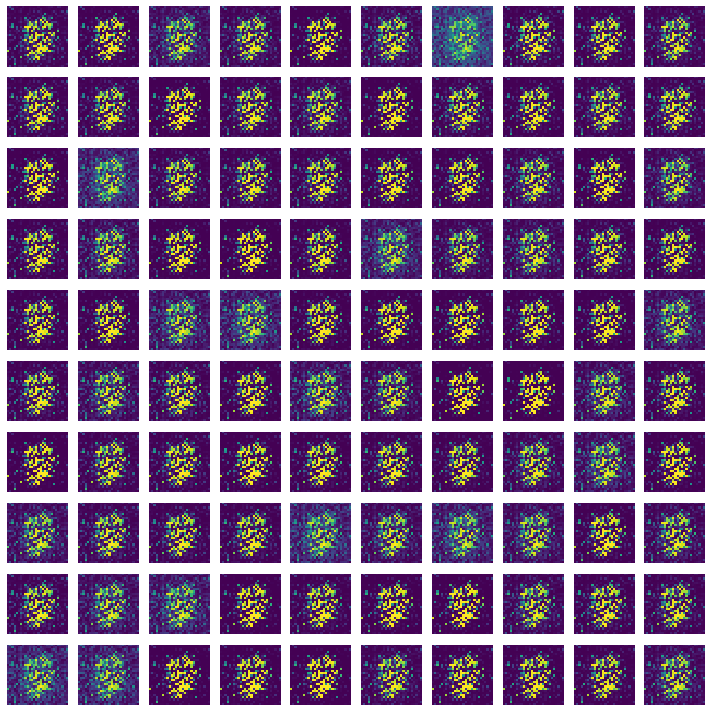

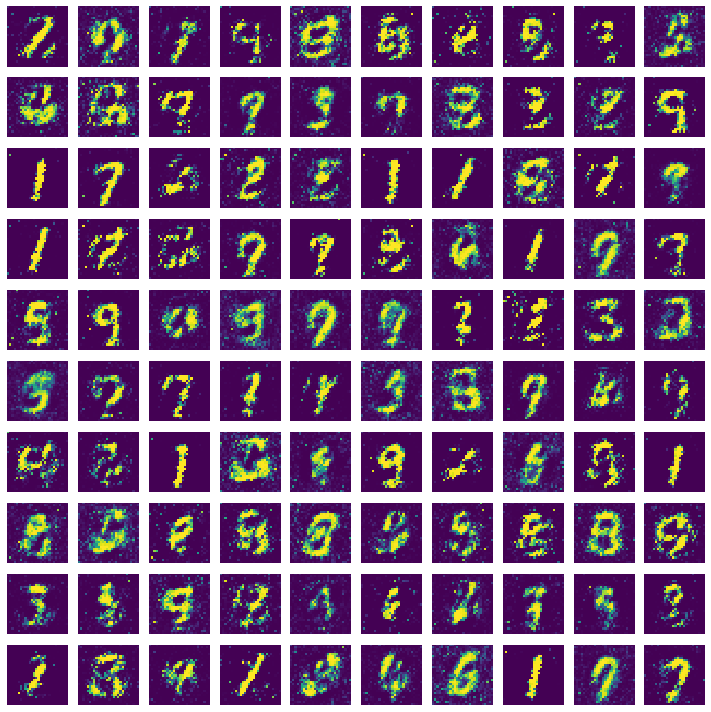

In [ ]:


def training(epochs):

    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data to create a binary classification setup
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if  e == 1 or e % 20 == 0:
            plot_generated_images(e, generator)

training(epochs=20)